### word2vec預訓練模型

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format(
    './google_pre_vec/GoogleNews-vectors-negative300.bin.gz',
    binary=True) 

In [2]:
model["0"] #google預訓練模型中的字詞為300維表示

array([ 0.15234375, -0.12109375,  0.10205078, -0.08398438, -0.18457031,
        0.01531982,  0.23828125, -0.47851562,  0.07275391,  0.21875   ,
       -0.1015625 ,  0.05102539, -0.171875  , -0.04101562, -0.08984375,
       -0.01989746,  0.375     ,  0.171875  ,  0.08349609,  0.10302734,
       -0.10498047, -0.11132812, -0.08740234, -0.08349609,  0.14550781,
       -0.18945312, -0.16894531,  0.10107422,  0.20703125, -0.00595093,
       -0.28320312, -0.1171875 ,  0.12353516, -0.34179688, -0.375     ,
        0.22460938, -0.16503906,  0.11230469, -0.34375   ,  0.16796875,
        0.27148438, -0.17675781, -0.04150391,  0.18066406, -0.02307129,
        0.10253906,  0.14648438, -0.26757812, -0.10498047,  0.03295898,
       -0.20996094,  0.16308594, -0.04052734,  0.06738281, -0.11621094,
        0.18945312, -0.20214844, -0.00405884, -0.02563477,  0.04980469,
       -0.05883789,  0.1875    , -0.15917969, -0.12792969,  0.12988281,
        0.05200195,  0.09765625,  0.16894531,  0.36132812,  0.33

### 載入文本、前處理

In [4]:
import pandas as pd
import numpy as np

#測試先讀入其中一個資料就好
aud_df = pd.read_csv("./Pre_data/move_window/AUD/AUD1.csv", index_col = 0)
aud_df

,date,word2vec_body,tfidf_body,source_title,binary,ternary_1,ternary_2
0,2016-01-04,as markets reopen for the first week of invest...,market reopen first week investor focus asia c...,CNBC,0.0,0.0,0.0
1,2016-01-04,the global financial markets in were pulled be...,global financial market pull two oppose force ...,Seeking Alpha,0.0,0.0,0.0
2,2016-01-04,exporters increase currency protection to lock...,exporter increase currency protection lock wea...,Bloomberg Business,0.0,0.0,0.0
3,2016-01-05,stocks slide amid risk aversion after shiite c...,stock slide amid risk aversion shiite cleric e...,Bloomberg Business,0.0,0.0,0.0
4,2016-01-05,the canadian and australian dollars rose after...,canadian australian dollar rise people bank ch...,Bloomberg Business,0.0,0.0,0.0
...,...,...,...,...,...,...,...
11646,2020-06-30,redbubble asx rbl otcrdbbf otcrdbby is a yearo...,redbubble asx rbl otcrdbbf otcrdbby yearold au...,Seeking Alpha,1.0,1.0,1.0
11647,2020-06-30,reading international inc nasdaqrdi q results ...,read international inc nasdaqrdi q result earn...,Seeking Alpha,1.0,1.0,1.0
11648,2020-06-30,energy and financials are the biggest drags wh...,energy financials big drag real estate informa...,Yahoo Finance,1.0,1.0,1.0
11649,2020-06-30,dragged down by declines for shares of boeing ...,drag decline share boeing dow inc dow jones in...,MarketWatch,1.0,1.0,1.0


In [47]:
import nltk #英語NLP套件
print("文章篇數: ",aud_df.shape[0])

body_length = 0
tfidftext_length = 0
body_length_list = []
tfidftext_length_list = []

for i in range(aud_df.shape[0]):    
    a = aud_df['word2vec_body'][i]
    newstokens = nltk.tokenize.word_tokenize(a)
    body_length += len(newstokens)
    body_length_list.append(len(newstokens))
    
    b = aud_df['tfidf_body'][i]
    newstokens_b = nltk.tokenize.word_tokenize(b)
    tfidftext_length += len(newstokens_b)
    tfidftext_length_list.append(len(newstokens_b))
    
print("平均文本長度為：",body_length//aud_df.shape[0])
print("最長文本長度:",max(body_length_list))
print("最短文本長度:",min(body_length_list),"\n")

print("去除停用詞之平均文本長度為：",tfidftext_length//aud_df.shape[0])
print("去除停用詞之最長文本長度:",max(tfidftext_length_list))
print("去除停用詞之最短文本長度:",min(tfidftext_length_list),"\n")

文章篇數:  11651
平均文本長度為： 985
最長文本長度: 16856
最短文本長度: 54 

去除停用詞之平均文本長度為： 566
去除停用詞之最長文本長度: 8279
去除停用詞之最短文本長度: 33 



In [60]:
section1=0
section2=0
section3=0
section4=0
section5=0
outlier = 0

for i in body_length_list:
    if i <=300:
        section1+=1
    elif 300<i<=600:
        section2+=1
    elif 600<i<=1000:
        section3+=1
    elif 1000<i<=2000:
        section4+=1
    elif 2000<i<=4000:
        section5+=1
    elif 4000<i:
        outlier +=1

print(section1,section2,section3,section4,section5,outlier)

1682 4032 3167 1721 591 458


In [6]:
a = np.array(aud_df["binary"])
print(a)

#因為在深度模型的分類問題中，對於label需要以one hot encode的編碼表示
from tensorflow.keras.utils import to_categorical
a = to_categorical(a)
print(a)

[0. 0. 0. ... 1. 1. 1.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
import pandas as pd
# 輸入檔案路徑給你df
def load_text(text):
    df = pd.read_csv(text, index_col = 0)
    return df

In [8]:
# 輸入文本幫你轉成文字向量
def text_to_vec(text):
    wordvec = np.array([])
    word_list = text.split(" ")
    words = list()
    count = 0
    
    #固定文本長度為500，不足的字填補none這個字，超過的部分就不要
    for i in range(512):
        if i < len(word_list):
            words.append(word_list[i])
        else:
            words.append("0")
            
    for word in words:
            
        try:
            #使用np.append以確定所有list都是以np.array的形式表現
            wordvec = np.append(wordvec, model[word])

        except KeyError:
            #如果有看不懂的字，我就以(300)維0向量替代看不懂的字
            wordvec = np.append(wordvec,np.zeros(300))
            continue    
    #重塑矩陣形狀為500字300詞向量的二維矩陣(這是一個確保，以免形狀不對)
    return wordvec.reshape(512, 300)

In [9]:
# 測試func
a = aud_df["word2vec_body"][0]
worvec = text_to_vec(a)

#就是因為是np所以有shape可調用，如果是list就沒有。
print(worvec.shape[1])
print(worvec.shape[0])

300
512


In [11]:
#將一整年的AUS/USD相關的財經新聞都做向量轉換!
#df = load_text("./Pre_data/move_window/test/0.csv")
total_textvec_list =np.array([]) 
for index in range(aud_df.shape[0]):
    text = aud_df["word2vec_body"][index]
    total_textvec_list = np.append(total_textvec_list,text_to_vec(text))

# 將資料重塑維度(幾篇文章，文本長度，詞向量長度)
total_textvec_list = total_textvec_list.reshape(df.shape[0],512,300)        

### 建立分類模型(LSTM/CNN為主)

In [20]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import os
import pydot
import graphviz 
os.environ["PATH"] += os.pathsep + 'C:/Users/toby/ML&DL/AI實務課程/Deeplearning/code/release/bin'
tf.compat.v1.reset_default_graph()

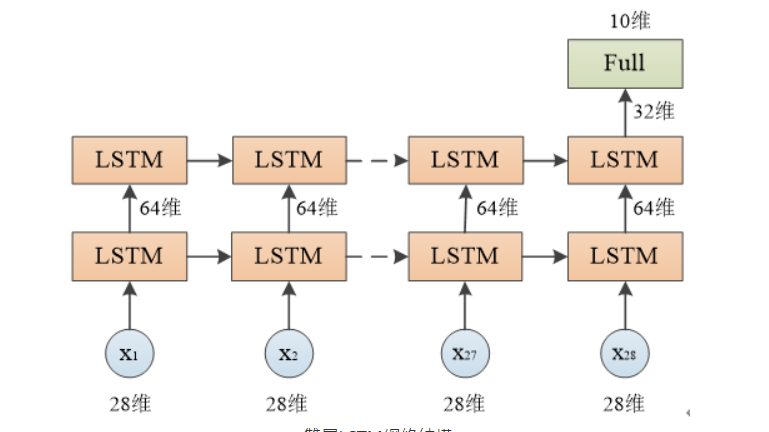

In [49]:
def DoubleLSTM(train_x,train_y,valid_x,valid_y,test_x,test_y):
    #创建模型
    model=Sequential()
    model.add(LSTM(32,input_shape=(500,300),return_sequences=True))  #返回所有节点的输出
    model.add(Dropout(0.2))
    model.add(LSTM(16,return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(2,activation='softmax'))
    #查看网络结构
    model.summary()
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    model.fit(train_x,train_y,batch_size=100,epochs=60,verbose=2,validation_data=(valid_x,valid_y))
    #评估模型
    pre=model.evaluate(test_x,test_y)
    print('test_loss:',pre[0],'- test_acc:',pre[1])
    return model

In [14]:
print(df.loc[df['date'] == '2016-09-01'])
print(df.loc[df['date'] == '2016-11-01'])

                  date                                      word2vec_body  \
Unnamed: 0                                                                  
1953        2016-09-01  spot turnover eased but swap turnover increase...   
1954        2016-09-01  socks and mail are not obvious bedfellows but ...   
1955        2016-09-01  cheap pico projectors are detrimental to epson...   
1956        2016-09-01  san jose calif sep  business wire verifone pay...   
1957        2016-09-01  by chelsey dulaney chelsey dulaney the wall st...   
1958        2016-09-01  there is still enough opportunity to compensat...   
1959        2016-09-01  when it comes to currency trading it really is...   
1960        2016-09-01  denver perth australia aug  business wire sams...   
1961        2016-09-01  a still image of cocaine packets seize aboard ...   
1962        2016-09-01  london is losing its grip on a global currenci...   
1963        2016-09-01  china official manufacturing pmi is at its bes...   

In [15]:
train_x = total_textvec_list[0:1953]
train_y = to_categorical(np.array(df["result"][0:1953]))
valid_x = total_textvec_list[1953:2354]
valid_y = to_categorical(np.array(df["result"][1953:2354]))
test_x = total_textvec_list[2354:]
test_y = to_categorical(np.array(df["result"][2354:]))

In [16]:
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)
print(train_y.shape)
print(valid_y.shape)
print(test_y.shape)

(1953, 500, 300)
(401, 500, 300)
(371, 500, 300)
(1953, 2)
(401, 2)
(371, 2)


In [53]:
double_lstm = DoubleLSTM(train_x,train_y,valid_x,valid_y,test_x,test_y)

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

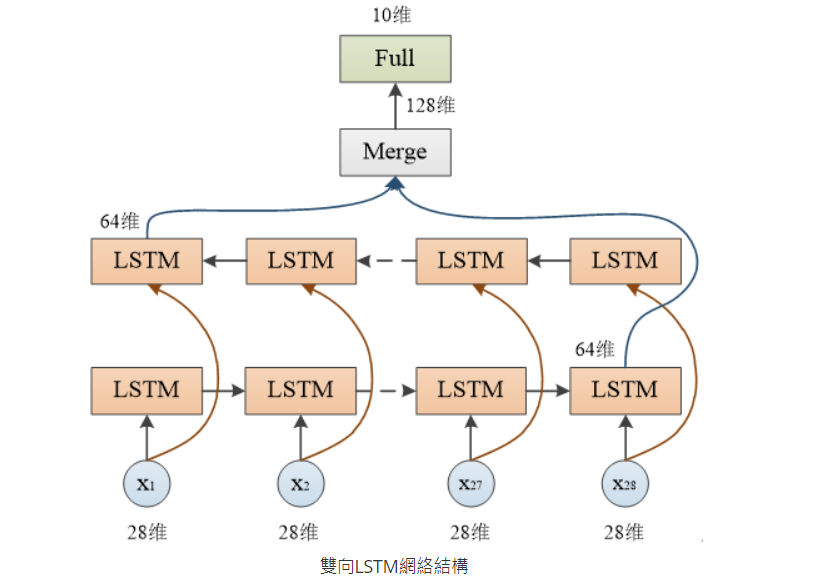

In [22]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional

def BiLSTM(train_x,train_y,valid_x,valid_y,test_x,test_y):
    #创建模型
    model=Sequential()
    lstm=LSTM(32,input_shape=(500,300),return_sequences=False)  #返回最后一个节点的输出
    model.add(Dropout(0.2))
    model.add(Bidirectional(lstm))  #双向LSTM
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='softmax'))
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    model.fit(train_x,train_y,batch_size=100,epochs=20,verbose=2,validation_data=(valid_x,valid_y))
    #查看网络结构
    model.summary()
    #评估模型
    pre=model.evaluate(test_x,test_y)
    print('test_loss:',pre[0],'- test_acc:',pre[1])
    return model

In [23]:
bi_lstm = BiLSTM(train_x,train_y,valid_x,valid_y,test_x,test_y)

Epoch 1/40
20/20 - 15s - loss: 0.6909 - accuracy: 0.5381 - val_loss: 0.6142 - val_accuracy: 0.7531
Epoch 2/40
20/20 - 12s - loss: 0.6845 - accuracy: 0.5632 - val_loss: 0.6491 - val_accuracy: 0.7082
Epoch 3/40
20/20 - 12s - loss: 0.6727 - accuracy: 0.5627 - val_loss: 0.6440 - val_accuracy: 0.7207
Epoch 4/40
20/20 - 13s - loss: 0.6631 - accuracy: 0.5965 - val_loss: 0.6691 - val_accuracy: 0.6359
Epoch 5/40
20/20 - 13s - loss: 0.6470 - accuracy: 0.6247 - val_loss: 0.6865 - val_accuracy: 0.5711
Epoch 6/40
20/20 - 13s - loss: 0.6296 - accuracy: 0.6457 - val_loss: 0.6455 - val_accuracy: 0.6559
Epoch 7/40
20/20 - 13s - loss: 0.5933 - accuracy: 0.6795 - val_loss: 0.6589 - val_accuracy: 0.6284
Epoch 8/40
20/20 - 13s - loss: 0.5507 - accuracy: 0.7250 - val_loss: 0.7933 - val_accuracy: 0.5312
Epoch 9/40
20/20 - 13s - loss: 0.5095 - accuracy: 0.7517 - val_loss: 0.8268 - val_accuracy: 0.5187
Epoch 10/40
20/20 - 13s - loss: 0.4690 - accuracy: 0.7773 - val_loss: 0.7480 - val_accuracy: 0.5910
Epoch 11/

In [17]:
def CNN(train_x,train_y,valid_x,valid_y,test_x,test_y):
    #创建模型
    model=Sequential()
    model.add(layers.Conv2D(64, (3, 300), activation='relu', input_shape=(500, 300, 1)))
    model.add(layers.Conv2D(32, (3, 1), activation='relu'))
    model.add(layers.MaxPooling2D((2, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dense(2,activation='softmax'))
    
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #训练模型
    model.fit(train_x,train_y,batch_size=300,epochs=20,verbose=2,validation_data=(valid_x,valid_y))
    #查看网络结构
    model.summary()
    #评估模型
    pre=model.evaluate(test_x,test_y)
    print('test_loss:',pre[0],'- test_acc:',pre[1])
    return model

In [18]:
train_x_cnn = train_x.reshape(1953,500, 300, 1)

valid_x_cnn = valid_x.reshape(401,500, 300, 1)

test_x_cnn = test_x.reshape(371,500, 300, 1)


In [ ]:
cnn = CNN(train_x_cnn,train_y,valid_x_cnn,valid_y,test_x_cnn,test_y)

Epoch 1/20


In [28]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

input1 = Input(shape=(500,300),name="input1")
input2 = Input(shape=(500,300,1),name="input2")

lstm1 = LSTM(64,return_sequences=True)(input1)
lstm2 = LSTM(32,return_sequences=False)(lstm1)
lstm_output = Dense(2,activation='sigmoid')(lstm2)

cnn1 = layers.Conv2D(64, (3, 300), activation='relu', input_shape=(500, 300, 1))(input2)
cnn2 = layers.Conv2D(32, (3, 1), activation='relu')(cnn1)
cnn3 = layers.MaxPooling2D((2, 1))(cnn2)
cnn_flat = layers.Flatten()(cnn3)
cnn_dense = layers.Dense(64, activation='relu')(cnn_flat)
cnn_output = Dense(2,activation='sigmoid')(cnn_dense)

merged_vector = keras.layers.concatenate([lstm_output, cnn_output])

predictions = Dense(2, activation='softmax')(merged_vector)


model_lstm_cnn = Model(inputs=[input1, input2], outputs=predictions)

model_lstm_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_lstm_cnn.fit(x=[train_x,train_x_cnn], y=train_y, validation_data = ([valid_x,valid_x_cnn],valid_y),epochs=40, batch_size=100)

Epoch 1/40
20/20 [==============================] - 36s 2s/step - loss: 0.6999 - accuracy: 0.5069 - val_loss: 0.6608 - val_accuracy: 0.7556
Epoch 2/40
20/20 [==============================] - 34s 2s/step - loss: 0.6890 - accuracy: 0.5520 - val_loss: 0.6602 - val_accuracy: 0.7556
Epoch 3/40
20/20 [==============================] - 33s 2s/step - loss: 0.6884 - accuracy: 0.5520 - val_loss: 0.6533 - val_accuracy: 0.7556
Epoch 4/40
20/20 [==============================] - 33s 2s/step - loss: 0.6872 - accuracy: 0.5520 - val_loss: 0.6635 - val_accuracy: 0.7506
Epoch 5/40
20/20 [==============================] - 33s 2s/step - loss: 0.6851 - accuracy: 0.5607 - val_loss: 0.6463 - val_accuracy: 0.7382
Epoch 6/40
20/20 [==============================] - 33s 2s/step - loss: 0.6785 - accuracy: 0.6001 - val_loss: 0.6451 - val_accuracy: 0.7182
Epoch 7/40
20/20 [==============================] - 33s 2s/step - loss: 0.6693 - accuracy: 0.6093 - val_loss: 0.6705 - val_accuracy: 0.5910
Epoch 8/40
20/20 [==

In [29]:
model_lstm_cnn.evaluate([test_x,test_x_cnn],test_y)

12/12 [==============================] - 2s 139ms/step - loss: 0.8109 - accuracy: 0.4825


[0.8108868598937988, 0.4824797809123993]

In [187]:
#baseline
neg = 0
pos = 0

for i in df["result"][2354:]:
    if i == 0:
        neg+=1
    if i == 1:
        pos+=1

print("負樣本百分比 : ",(neg/df["result"][2354:].shape[0])*100)
print("正樣本百分比 : ",(pos/df["result"][2354:].shape[0])*100)

負樣本百分比 :  46.36118598382749
正樣本百分比 :  53.63881401617251


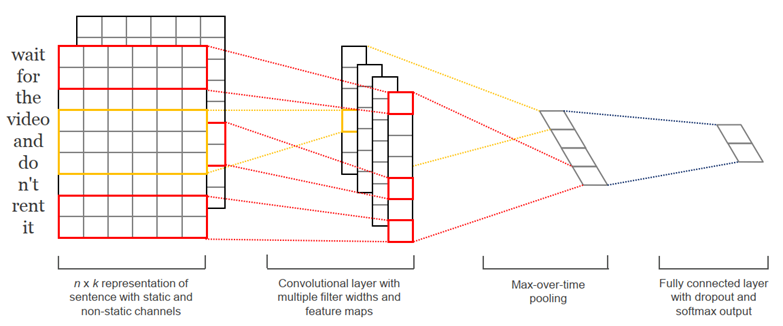

In [30]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

input1 = Input(shape=(500,300,1),name="input1")

hidden1_1 = layers.Conv2D(64, (3, 300), activation='relu', input_shape=(500, 300, 1))(input1)
hidden1_2 = layers.MaxPooling2D((4, 1))(hidden1_1)
hidden1_3 = layers.Flatten()(hidden1_2)

hidden2_1 = layers.Conv2D(64, (5, 300), activation='relu', input_shape=(500, 300, 1))(input1)
hidden2_2 = layers.MaxPooling2D((5, 1))(hidden2_1)
hidden2_3 = layers.Flatten()(hidden2_2)

hidden3_1 = layers.Conv2D(64, (7, 300), activation='relu', input_shape=(500, 300, 1))(input1)
hidden3_2 = layers.MaxPooling2D((6, 1))(hidden3_1)
hidden3_3 = layers.Flatten()(hidden3_2)

merged_vector = keras.layers.concatenate([hidden1_3, hidden2_3, hidden3_3])
cnn_dense = layers.Dense(64, activation='relu')(merged_vector)
cnn_output = Dense(2,activation='sigmoid')(cnn_dense)

predictions = Dense(2, activation='softmax')(merged_vector)


model_3cnn = Model(inputs=[input1], outputs=predictions)

model_3cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_3cnn.fit(x=[train_x_cnn], y=train_y, validation_data =([valid_x_cnn,valid_x_cnn,valid_x_cnn],valid_y), epochs=15, batch_size=300)


Epoch 1/30
7/7 [==============================] - 13s 2s/step - loss: 0.7165 - accuracy: 0.5013 - val_loss: 0.6984 - val_accuracy: 0.2569
Epoch 2/30
7/7 [==============================] - 11s 2s/step - loss: 0.6857 - accuracy: 0.6441 - val_loss: 0.6343 - val_accuracy: 0.7556
Epoch 3/30
7/7 [==============================] - 11s 2s/step - loss: 0.6681 - accuracy: 0.5822 - val_loss: 0.6383 - val_accuracy: 0.7556
Epoch 4/30
7/7 [==============================] - 10s 1s/step - loss: 0.6363 - accuracy: 0.6667 - val_loss: 0.6506 - val_accuracy: 0.7107
Epoch 5/30
7/7 [==============================] - 11s 2s/step - loss: 0.5924 - accuracy: 0.7225 - val_loss: 0.5876 - val_accuracy: 0.7481
Epoch 6/30
7/7 [==============================] - 11s 2s/step - loss: 0.5402 - accuracy: 0.7875 - val_loss: 0.6562 - val_accuracy: 0.6509
Epoch 7/30
7/7 [==============================] - 11s 2s/step - loss: 0.4724 - accuracy: 0.8853 - val_loss: 0.6942 - val_accuracy: 0.5736
Epoch 8/30
7/7 [==================

In [31]:
model_3cnn.evaluate([test_x_cnn,test_x_cnn,test_x_cnn], test_y)

12/12 [==============================] - 1s 49ms/step - loss: 1.0162 - accuracy: 0.5445


[1.0162160396575928, 0.5444744229316711]

### glove 預訓練模型

In [35]:
# glove 載入

embeddings_index = {}
f = open('./glove_pre_vec/glove.txt',encoding='utf-8')
for line in f:
    values = line.split(" ")
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 840B 300d.' % len(embeddings_index))

Total 2196017 word vectors in Glove 840B 300d.


In [36]:
embeddings_index["word"]

array([-1.4424e-02, -6.0105e-03, -2.3573e-01,  5.5827e-02,  1.6621e-01,
        8.5860e-02,  5.6778e-02, -1.2082e-01, -2.0680e-01,  1.8227e+00,
       -1.8968e-01,  9.6278e-02,  3.1150e-01, -3.5110e-01,  1.6807e-01,
        4.3519e-01, -2.8470e-01,  8.6006e-01, -8.3357e-02, -2.6110e-01,
        9.9658e-02,  3.4132e-02, -8.2531e-02,  3.2734e-01,  2.4354e-01,
       -1.1849e-01, -8.7074e-02,  3.1350e-01,  1.1809e-01, -1.6978e-01,
        1.0025e-01,  3.4180e-01,  2.4852e-01,  2.8507e-01,  1.8219e-01,
        2.1475e-01,  2.0191e-01, -1.7904e-01, -9.4466e-01,  9.4922e-02,
        8.2908e-02,  1.0934e-01,  1.6067e-01, -5.6888e-01,  3.4838e-01,
       -1.3593e-01,  1.0840e-01,  1.8630e-01,  2.8772e-01,  2.6694e-01,
       -4.7447e-01,  6.2358e-01, -6.5017e-02,  1.7541e-01,  2.7851e-01,
       -1.3052e-01, -2.0737e-02,  3.8333e-01, -3.8793e-01, -2.3795e-01,
        7.8389e-02,  4.3421e-01, -3.8339e-02,  3.6992e-01,  7.5892e-02,
       -1.2072e-01, -3.5845e-01, -8.7293e-02,  5.7002e-01,  5.14

In [37]:
# 輸入文本幫你轉成文字向量
def text_to_glovevec(text):
    wordvec = np.array([])
    word_list = text.split(" ")
    words = list()
    count = 0
    
    #固定文本長度為500，不足的字填補none這個字，超過的部分就不要
    for i in range(500):
        if i < len(word_list):
            words.append(word_list[i])
        else:
            words.append("none")
            
    for word in words:
            
        try:
            #使用np.append以確定所有list都是以np.array的形式表現
            wordvec = np.append(wordvec, embeddings_index[word])

        except KeyError:
            #如果有看不懂的字，我就以(300)維0向量替代看不懂的字
            wordvec = np.append(wordvec,np.zeros(300))
            continue    
    #重塑矩陣形狀為500字300詞向量的二維矩陣(這是一個確保，以免形狀不對)
    return wordvec.reshape(500, 300)

In [38]:
#測試丟一篇文章進去看看
a = df["word2vec_body"][0]
glove = text_to_glovevec(a)

#就是因為是np所以有shape可調用，如果是list就沒有。
print(glove.shape[1])
print(glove.shape[0])

300
500


In [43]:
#將一整年的AUS/USD相關的財經新聞都做向量轉換!
df = load_text("./Pre_data/move_window/test/0.csv")
glove_textvec_list =np.array([]) 
for index in range(df.shape[0]):
    text = df["word2vec_body"][index]
    glove_textvec_list = np.append(glove_textvec_list,text_to_glovevec(text))

# 將資料重塑維度(幾篇文章，文本長度，詞向量長度)
glove_textvec_list = glove_textvec_list.reshape(df.shape[0],500,300)     

In [44]:
glove_textvec_list.shape

(2725, 500, 300)

In [45]:
train_x = glove_textvec_list[0:1953]
train_y = to_categorical(np.array(df["result"][0:1953]))
valid_x = glove_textvec_list[1953:2354]
valid_y = to_categorical(np.array(df["result"][1953:2354]))
test_x = glove_textvec_list[2354:]
test_y = to_categorical(np.array(df["result"][2354:]))

In [46]:
print(train_y.shape)
print(valid_y.shape)
print(test_y.shape)

(1953, 2)
(401, 2)
(371, 2)


In [47]:
glove_double_lstm = DoubleLSTM(train_x,train_y,valid_x,valid_y,test_x,test_y)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 500, 32)           42624     
_________________________________________________________________
lstm_10 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 34        
Total params: 45,794
Trainable params: 45,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
20/20 - 56s - loss: 0.6959 - accuracy: 0.5248 - val_loss: 0.6355 - val_accuracy: 0.7456
Epoch 2/60
20/20 - 47s - loss: 0.6875 - accuracy: 0.5597 - val_loss: 0.6581 - val_accuracy: 0.7382
Epoch 3/60
20/20 - 40s - loss: 0.6811 - accuracy: 0.5725 - val_loss: 0.6247 - val_accuracy: 0.7531
Epoch 4/60
20/20 - 42s - loss: 0.6785 - accuracy: 0.5791 - val_loss: 0.6367 - val_a

In [48]:
glove_bi_lstm = BiLSTM(train_x,train_y,valid_x,valid_y,test_x,test_y)

Epoch 1/40
20/20 - 57s - loss: 0.6964 - accuracy: 0.5274 - val_loss: 0.6176 - val_accuracy: 0.7307
Epoch 2/40
20/20 - 52s - loss: 0.6757 - accuracy: 0.5776 - val_loss: 0.6239 - val_accuracy: 0.7357
Epoch 3/40
20/20 - 52s - loss: 0.6599 - accuracy: 0.6078 - val_loss: 0.6409 - val_accuracy: 0.6908
Epoch 4/40
20/20 - 60s - loss: 0.6406 - accuracy: 0.6446 - val_loss: 0.6772 - val_accuracy: 0.5636
Epoch 5/40
20/20 - 71s - loss: 0.6188 - accuracy: 0.6928 - val_loss: 0.6368 - val_accuracy: 0.6633
Epoch 6/40
20/20 - 72s - loss: 0.5878 - accuracy: 0.7097 - val_loss: 0.6712 - val_accuracy: 0.5985
Epoch 7/40
20/20 - 71s - loss: 0.5490 - accuracy: 0.7481 - val_loss: 0.6430 - val_accuracy: 0.6509
Epoch 8/40
20/20 - 57s - loss: 0.4932 - accuracy: 0.7870 - val_loss: 0.6751 - val_accuracy: 0.6359
Epoch 9/40
20/20 - 49s - loss: 0.4428 - accuracy: 0.8208 - val_loss: 0.8320 - val_accuracy: 0.5337
Epoch 10/40
20/20 - 69s - loss: 0.3678 - accuracy: 0.8664 - val_loss: 0.8128 - val_accuracy: 0.5711
Epoch 11/

In [49]:
train_x_cnn = train_x.reshape(1953,500, 300, 1)

valid_x_cnn = valid_x.reshape(401,500, 300, 1)

test_x_cnn = test_x.reshape(371,500, 300, 1)

In [50]:
glove_cnn = CNN(train_x_cnn,train_y,valid_x_cnn,valid_y,test_x_cnn,test_y)

Epoch 1/20
7/7 - 17s - loss: 0.7060 - accuracy: 0.4834 - val_loss: 0.6418 - val_accuracy: 0.7556
Epoch 2/20
7/7 - 19s - loss: 0.6839 - accuracy: 0.5520 - val_loss: 0.6706 - val_accuracy: 0.7556
Epoch 3/20
7/7 - 19s - loss: 0.6745 - accuracy: 0.5545 - val_loss: 0.6265 - val_accuracy: 0.7556
Epoch 4/20
7/7 - 20s - loss: 0.6556 - accuracy: 0.6180 - val_loss: 0.6046 - val_accuracy: 0.7556
Epoch 5/20
7/7 - 20s - loss: 0.6150 - accuracy: 0.6953 - val_loss: 0.5857 - val_accuracy: 0.7556
Epoch 6/20
7/7 - 19s - loss: 0.5571 - accuracy: 0.7691 - val_loss: 0.6926 - val_accuracy: 0.5636
Epoch 7/20
7/7 - 19s - loss: 0.4593 - accuracy: 0.8730 - val_loss: 0.7616 - val_accuracy: 0.5012
Epoch 8/20
7/7 - 20s - loss: 0.3654 - accuracy: 0.8945 - val_loss: 0.6816 - val_accuracy: 0.6234
Epoch 9/20
7/7 - 20s - loss: 0.2691 - accuracy: 0.9288 - val_loss: 0.6934 - val_accuracy: 0.6384
Epoch 10/20
7/7 - 20s - loss: 0.2320 - accuracy: 0.9411 - val_loss: 0.7283 - val_accuracy: 0.6135
Epoch 11/20
7/7 - 20s - loss:

In [51]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model

input1 = Input(shape=(500,300),name="input1")
input2 = Input(shape=(500,300,1),name="input2")

lstm1 = LSTM(64,return_sequences=True)(input1)
lstm2 = LSTM(32,return_sequences=False)(lstm1)
lstm_output = Dense(2,activation='sigmoid')(lstm2)

cnn1 = layers.Conv2D(64, (3, 300), activation='relu', input_shape=(500, 300, 1))(input2)
cnn2 = layers.Conv2D(32, (3, 1), activation='relu')(cnn1)
cnn3 = layers.MaxPooling2D((2, 1))(cnn2)
cnn_flat = layers.Flatten()(cnn3)
cnn_dense = layers.Dense(64, activation='relu')(cnn_flat)
cnn_output = Dense(2,activation='sigmoid')(cnn_dense)

merged_vector = keras.layers.concatenate([lstm_output, cnn_output])

predictions = Dense(2, activation='softmax')(merged_vector)


glove_lstm_cnn = Model(inputs=[input1, input2], outputs=predictions)

glove_lstm_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
glove_lstm_cnn.fit(x=[train_x,train_x_cnn], y=train_y, validation_data = ([valid_x,valid_x_cnn],valid_y),epochs=40, batch_size=100)

Epoch 1/40
20/20 [==============================] - 47s 2s/step - loss: 0.6893 - accuracy: 0.5520 - val_loss: 0.6404 - val_accuracy: 0.7556
Epoch 2/40
20/20 [==============================] - 49s 2s/step - loss: 0.6874 - accuracy: 0.5520 - val_loss: 0.6438 - val_accuracy: 0.7556
Epoch 3/40
20/20 [==============================] - 51s 3s/step - loss: 0.6866 - accuracy: 0.5520 - val_loss: 0.6438 - val_accuracy: 0.7556
Epoch 4/40
20/20 [==============================] - 52s 3s/step - loss: 0.6841 - accuracy: 0.5535 - val_loss: 0.6654 - val_accuracy: 0.6359
Epoch 5/40
20/20 [==============================] - 51s 3s/step - loss: 0.6827 - accuracy: 0.5730 - val_loss: 0.6515 - val_accuracy: 0.7132
Epoch 6/40
20/20 [==============================] - 46s 2s/step - loss: 0.6768 - accuracy: 0.5996 - val_loss: 0.6476 - val_accuracy: 0.6783
Epoch 7/40
20/20 [==============================] - 45s 2s/step - loss: 0.6699 - accuracy: 0.6252 - val_loss: 0.6698 - val_accuracy: 0.5810
Epoch 8/40
20/20 [==

In [52]:
glove_lstm_cnn.evaluate([test_x,test_x_cnn],test_y)

12/12 [==============================] - 2s 161ms/step - loss: 0.7919 - accuracy: 0.5040


[0.7919459342956543, 0.5040431022644043]

In [53]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

input1 = Input(shape=(500,300,1),name="input1")
input2 = Input(shape=(500,300,1),name="input2")
input3 = Input(shape=(500,300,1),name="input3")

hidden1_1 = layers.Conv2D(64, (3, 300), activation='relu', input_shape=(500, 300, 1))(input1)
hidden1_2 = layers.MaxPooling2D((4, 1))(hidden1_1)
hidden1_3 = layers.Flatten()(hidden1_2)

hidden2_1 = layers.Conv2D(64, (5, 300), activation='relu', input_shape=(500, 300, 1))(input2)
hidden2_2 = layers.MaxPooling2D((5, 1))(hidden2_1)
hidden2_3 = layers.Flatten()(hidden2_2)

hidden3_1 = layers.Conv2D(64, (7, 300), activation='relu', input_shape=(500, 300, 1))(input3)
hidden3_2 = layers.MaxPooling2D((6, 1))(hidden3_1)
hidden3_3 = layers.Flatten()(hidden3_2)

merged_vector = keras.layers.concatenate([hidden1_3, hidden2_3, hidden3_3])
cnn_dense = layers.Dense(64, activation='relu')(merged_vector)
cnn_output = Dense(2,activation='sigmoid')(cnn_dense)

predictions = Dense(2, activation='softmax')(merged_vector)


glove_3cnn = Model(inputs=[input1, input2,input3], outputs=predictions)

glove_3cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
glove_3cnn.fit(x=[train_x_cnn,train_x_cnn,train_x_cnn], y=train_y, validation_data =([valid_x_cnn,valid_x_cnn,valid_x_cnn],valid_y), epochs=15, batch_size=300)


Epoch 1/15
7/7 [==============================] - 30s 4s/step - loss: 0.8027 - accuracy: 0.5090 - val_loss: 0.7343 - val_accuracy: 0.2444
Epoch 2/15
7/7 [==============================] - 27s 4s/step - loss: 0.6856 - accuracy: 0.4921 - val_loss: 0.6862 - val_accuracy: 0.6384
Epoch 3/15
7/7 [==============================] - 29s 4s/step - loss: 0.6526 - accuracy: 0.6103 - val_loss: 0.6916 - val_accuracy: 0.5561
Epoch 4/15
7/7 [==============================] - 30s 4s/step - loss: 0.6062 - accuracy: 0.7532 - val_loss: 0.7026 - val_accuracy: 0.5037
Epoch 5/15
7/7 [==============================] - 31s 4s/step - loss: 0.5390 - accuracy: 0.8182 - val_loss: 0.6232 - val_accuracy: 0.7107
Epoch 6/15
7/7 [==============================] - 29s 4s/step - loss: 0.4607 - accuracy: 0.8525 - val_loss: 0.5907 - val_accuracy: 0.7481
Epoch 7/15
7/7 [==============================] - 30s 4s/step - loss: 0.3841 - accuracy: 0.8961 - val_loss: 0.6085 - val_accuracy: 0.7032
Epoch 8/15
7/7 [==================

In [54]:
glove_3cnn.evaluate([test_x_cnn,test_x_cnn,test_x_cnn], test_y)

12/12 [==============================] - 2s 130ms/step - loss: 0.9922 - accuracy: 0.5310


[0.9922088980674744, 0.5309972763061523]

### 目前看起來的結果3CNN的效果似乎比較好，我們來調參它!!

In [89]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

def create_model(strides=1, num_neurons=64, fil_1=64, fil_2=64, fil_3=64, optimizer = "adam"):
    input1 = Input(shape=(500,300,1),name="input1")

    hidden1_1 = layers.Conv2D(fil_1, (3, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
    hidden1_2 = layers.MaxPooling2D((4, 1))(hidden1_1)
    hidden1_3 = layers.Flatten()(hidden1_2)

    hidden2_1 = layers.Conv2D(fil_2, (5, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
    hidden2_2 = layers.MaxPooling2D((5, 1))(hidden2_1)
    hidden2_3 = layers.Flatten()(hidden2_2)

    hidden3_1 = layers.Conv2D(fil_3, (7, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
    hidden3_2 = layers.MaxPooling2D((6, 1))(hidden3_1)
    hidden3_3 = layers.Flatten()(hidden3_2)

    merged_vector = keras.layers.concatenate([hidden1_3, hidden2_3, hidden3_3])
    cnn_dense = layers.Dense(num_neurons, activation='relu')(merged_vector)
    cnn_output = Dense(2,activation='sigmoid')(cnn_dense)

    predictions = Dense(2, activation='softmax')(merged_vector)


    glove_3filter_cnn = Model(inputs=input1, outputs=predictions)

    glove_3filter_cnn.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return glove_3filter_cnn


In [90]:
# 移動的格數、NN數、優化器
from sklearn.model_selection import GridSearchCV
glove_3filter_cnn = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=15, verbose=1)
num_neurons = [32, 64, 128]
fil_1 = [32, 64]
fil_2 = [32, 64]
fil_3 = [32, 64]
strides = [1, 2]
optimizer = ["adam", "adagrad", "rmsprop"]
param_grid = dict(strides=strides, num_neurons=num_neurons, fil_1=fil_1, fil_2=fil_2, fil_3=fil_3, optimizer=optimizer)
grid = GridSearchCV(estimator=glove_3filter_cnn, param_grid=param_grid)


In [91]:
# 訓練
grid_result = grid.fit(train_x_cnn, train_y)

Epoch 1/15
49/49 [==============================] - 10s 186ms/step - loss: 0.7002 - accuracy: 0.5461
Epoch 2/15
49/49 [==============================] - 9s 188ms/step - loss: 0.5578 - accuracy: 0.7164
Epoch 3/15
49/49 [==============================] - 9s 190ms/step - loss: 0.3069 - accuracy: 0.9206
Epoch 4/15
49/49 [==============================] - 9s 190ms/step - loss: 0.1062 - accuracy: 0.9891
Epoch 5/15
49/49 [==============================] - 9s 188ms/step - loss: 0.0331 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 9s 191ms/step - loss: 0.0170 - accuracy: 0.9987
Epoch 7/15
49/49 [==============================] - 9s 191ms/step - loss: 0.0109 - accuracy: 0.9994
Epoch 8/15
49/49 [==============================] - 9s 190ms/step - loss: 0.0090 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 9s 189ms/step - loss: 0.0087 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 9s 192ms/step - loss: 0.0063 - accuracy: 0.999

49/49 [==============================] - 10s 208ms/step - loss: 0.6606 - accuracy: 0.5967
Epoch 5/15
49/49 [==============================] - 10s 208ms/step - loss: 0.6520 - accuracy: 0.6024
Epoch 6/15
49/49 [==============================] - 10s 206ms/step - loss: 0.6435 - accuracy: 0.6312
Epoch 7/15
49/49 [==============================] - 10s 209ms/step - loss: 0.6367 - accuracy: 0.6530
Epoch 8/15
49/49 [==============================] - 10s 208ms/step - loss: 0.6292 - accuracy: 0.6511
Epoch 9/15
49/49 [==============================] - 10s 209ms/step - loss: 0.6219 - accuracy: 0.6805
Epoch 10/15
49/49 [==============================] - 10s 206ms/step - loss: 0.6146 - accuracy: 0.7298
Epoch 11/15
49/49 [==============================] - 10s 207ms/step - loss: 0.6081 - accuracy: 0.7145
Epoch 12/15
49/49 [==============================] - 10s 209ms/step - loss: 0.6011 - accuracy: 0.7497
Epoch 13/15
49/49 [==============================] - 10s 206ms/step - loss: 0.5955 - accuracy: 0.75

49/49 [==============================] - 16s 325ms/step - loss: 0.0256 - accuracy: 0.9923
Epoch 8/15
49/49 [==============================] - 15s 308ms/step - loss: 0.0097 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 16s 326ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 10/15
49/49 [==============================] - 16s 321ms/step - loss: 0.0092 - accuracy: 0.9987
Epoch 11/15
49/49 [==============================] - 16s 331ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 12/15
49/49 [==============================] - 15s 296ms/step - loss: 0.0015 - accuracy: 0.9994
Epoch 13/15
49/49 [==============================] - 16s 331ms/step - loss: 0.0120 - accuracy: 0.9955
Epoch 14/15
49/49 [==============================] - 16s 328ms/step - loss: 0.0064 - accuracy: 0.9994
Epoch 15/15
13/13 [==============================] - 2s 142ms/step - loss: 1.5428 - accuracy: 0.5013
Epoch 1/15
49/49 [==============================] - 15s 305ms/step - loss: 0.7346 - accuracy: 0.5

49/49 [==============================] - 18s 364ms/step - loss: 0.0058 - accuracy: 0.9994
Epoch 11/15
49/49 [==============================] - 18s 367ms/step - loss: 0.0064 - accuracy: 0.9994
Epoch 12/15
49/49 [==============================] - 19s 383ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 13/15
49/49 [==============================] - 18s 376ms/step - loss: 0.0068 - accuracy: 0.9994
Epoch 14/15
49/49 [==============================] - 18s 374ms/step - loss: 0.0089 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 2s 171ms/step - loss: 1.1928 - accuracy: 0.4757
Epoch 1/15
49/49 [==============================] - 17s 342ms/step - loss: 0.7148 - accuracy: 0.5192
Epoch 2/15
49/49 [==============================] - 16s 325ms/step - loss: 0.6250 - accuracy: 0.6729
Epoch 3/15
49/49 [==============================] - 17s 344ms/step - loss: 0.4126 - accuracy: 0.8809
Epoch 4/15
49/49 [==============================] - 17s 352ms/step - loss: 0.1520 - accuracy: 0.97

49/49 [==============================] - 22s 440ms/step - loss: 0.6007 - accuracy: 0.7017
Epoch 13/15
49/49 [==============================] - 22s 441ms/step - loss: 0.5950 - accuracy: 0.8041
Epoch 14/15
49/49 [==============================] - 22s 448ms/step - loss: 0.5873 - accuracy: 0.8041
Epoch 15/15
13/13 [==============================] - 2s 182ms/step - loss: 0.7060 - accuracy: 0.5217
Epoch 1/15
49/49 [==============================] - 23s 456ms/step - loss: 0.6928 - accuracy: 0.5166
Epoch 2/15
49/49 [==============================] - 23s 460ms/step - loss: 0.6811 - accuracy: 0.5640
Epoch 3/15
49/49 [==============================] - 23s 469ms/step - loss: 0.6721 - accuracy: 0.5762
Epoch 4/15
49/49 [==============================] - 23s 465ms/step - loss: 0.6631 - accuracy: 0.6216
Epoch 5/15
49/49 [==============================] - 23s 464ms/step - loss: 0.6552 - accuracy: 0.6556
Epoch 6/15
49/49 [==============================] - 23s 473ms/step - loss: 0.6462 - accuracy: 0.6818

49/49 [==============================] - 18s 373ms/step - loss: 0.0087 - accuracy: 0.9994
Epoch 15/15
13/13 [==============================] - 2s 171ms/step - loss: 1.3639 - accuracy: 0.5115
Epoch 1/15
49/49 [==============================] - 19s 384ms/step - loss: 0.7862 - accuracy: 0.5090
Epoch 2/15
49/49 [==============================] - 19s 385ms/step - loss: 0.5724 - accuracy: 0.7375
Epoch 3/15
49/49 [==============================] - 19s 380ms/step - loss: 0.3096 - accuracy: 0.9296
Epoch 4/15
49/49 [==============================] - 19s 381ms/step - loss: 0.1399 - accuracy: 0.9763
Epoch 5/15
49/49 [==============================] - 19s 380ms/step - loss: 0.0737 - accuracy: 0.9885
Epoch 6/15
49/49 [==============================] - 19s 380ms/step - loss: 0.0466 - accuracy: 0.9949
Epoch 7/15
49/49 [==============================] - 19s 381ms/step - loss: 0.0423 - accuracy: 0.9962
Epoch 8/15
49/49 [==============================] - 17s 352ms/step - loss: 0.0371 - accuracy: 0.9962
E

49/49 [==============================] - 17s 349ms/step - loss: 0.7022 - accuracy: 0.5339
Epoch 2/15
49/49 [==============================] - 17s 344ms/step - loss: 0.5407 - accuracy: 0.7714
Epoch 3/15
49/49 [==============================] - 18s 359ms/step - loss: 0.2327 - accuracy: 0.9475
Epoch 4/15
49/49 [==============================] - 17s 349ms/step - loss: 0.0789 - accuracy: 0.9949
Epoch 5/15
49/49 [==============================] - 17s 346ms/step - loss: 0.0286 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 17s 351ms/step - loss: 0.0241 - accuracy: 0.9981
Epoch 7/15
49/49 [==============================] - 17s 355ms/step - loss: 0.0279 - accuracy: 0.9974
Epoch 8/15
49/49 [==============================] - 17s 355ms/step - loss: 0.0245 - accuracy: 0.9974
Epoch 9/15
49/49 [==============================] - 17s 343ms/step - loss: 0.0153 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 17s 341ms/step - loss: 0.0267 - accuracy: 0.9974


49/49 [==============================] - 22s 442ms/step - loss: 0.6707 - accuracy: 0.6005
Epoch 4/15
49/49 [==============================] - 21s 431ms/step - loss: 0.6611 - accuracy: 0.6325
Epoch 5/15
49/49 [==============================] - 22s 440ms/step - loss: 0.6533 - accuracy: 0.6652
Epoch 6/15
49/49 [==============================] - 21s 428ms/step - loss: 0.6447 - accuracy: 0.6562
Epoch 7/15
49/49 [==============================] - 22s 439ms/step - loss: 0.6368 - accuracy: 0.7260
Epoch 8/15
49/49 [==============================] - 21s 439ms/step - loss: 0.6292 - accuracy: 0.7375
Epoch 9/15
49/49 [==============================] - 22s 444ms/step - loss: 0.6212 - accuracy: 0.7702
Epoch 10/15
49/49 [==============================] - 21s 439ms/step - loss: 0.6133 - accuracy: 0.8060
Epoch 11/15
49/49 [==============================] - 21s 424ms/step - loss: 0.6061 - accuracy: 0.7926
Epoch 12/15
49/49 [==============================] - 22s 447ms/step - loss: 0.5990 - accuracy: 0.779

49/49 [==============================] - 19s 379ms/step - loss: 0.0784 - accuracy: 0.9846
Epoch 6/15
49/49 [==============================] - 19s 380ms/step - loss: 0.0424 - accuracy: 0.9930
Epoch 7/15
49/49 [==============================] - 18s 373ms/step - loss: 0.0326 - accuracy: 0.9930
Epoch 8/15
49/49 [==============================] - 18s 368ms/step - loss: 0.0388 - accuracy: 0.9955
Epoch 9/15
49/49 [==============================] - 17s 347ms/step - loss: 0.0187 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 18s 371ms/step - loss: 0.0204 - accuracy: 0.9981
Epoch 11/15
49/49 [==============================] - 18s 371ms/step - loss: 0.0343 - accuracy: 0.9974
Epoch 12/15
49/49 [==============================] - 18s 376ms/step - loss: 0.0280 - accuracy: 0.9974
Epoch 13/15
49/49 [==============================] - 18s 373ms/step - loss: 0.0298 - accuracy: 0.9981
Epoch 14/15
49/49 [==============================] - 18s 363ms/step - loss: 0.0071 - accuracy: 0.9

49/49 [==============================] - 25s 509ms/step - loss: 0.0266 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 25s 500ms/step - loss: 0.0162 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 25s 500ms/step - loss: 0.0130 - accuracy: 0.9987
Epoch 11/15
49/49 [==============================] - 25s 504ms/step - loss: 0.0319 - accuracy: 0.9974
Epoch 12/15
49/49 [==============================] - 25s 502ms/step - loss: 0.0178 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 25s 502ms/step - loss: 0.0292 - accuracy: 0.9981
Epoch 14/15
49/49 [==============================] - 25s 508ms/step - loss: 0.0109 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 3s 215ms/step - loss: 1.1359 - accuracy: 0.4706
Epoch 1/15
49/49 [==============================] - 23s 471ms/step - loss: 0.7020 - accuracy: 0.5237
Epoch 2/15
49/49 [==============================] - 23s 468ms/step - loss: 0.4725 - accuracy: 0.8

49/49 [==============================] - 28s 573ms/step - loss: 0.6107 - accuracy: 0.7650
Epoch 11/15
49/49 [==============================] - 29s 585ms/step - loss: 0.6036 - accuracy: 0.8169
Epoch 12/15
49/49 [==============================] - 29s 586ms/step - loss: 0.5954 - accuracy: 0.8355
Epoch 13/15
49/49 [==============================] - 27s 550ms/step - loss: 0.5870 - accuracy: 0.8592
Epoch 14/15
49/49 [==============================] - 28s 571ms/step - loss: 0.5807 - accuracy: 0.8585
Epoch 15/15
13/13 [==============================] - 3s 227ms/step - loss: 0.6958 - accuracy: 0.4936
Epoch 1/15
49/49 [==============================] - 29s 589ms/step - loss: 0.6856 - accuracy: 0.5525
Epoch 2/15
49/49 [==============================] - 28s 573ms/step - loss: 0.6776 - accuracy: 0.5698
Epoch 3/15
49/49 [==============================] - 28s 576ms/step - loss: 0.6668 - accuracy: 0.5915
Epoch 4/15
49/49 [==============================] - 28s 576ms/step - loss: 0.6587 - accuracy: 0.58

49/49 [==============================] - 28s 565ms/step - loss: 0.0209 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 27s 559ms/step - loss: 0.0253 - accuracy: 0.9981
Epoch 14/15
49/49 [==============================] - 28s 563ms/step - loss: 0.0308 - accuracy: 0.9974
Epoch 15/15
13/13 [==============================] - 3s 228ms/step - loss: 1.3591 - accuracy: 0.5345
Epoch 1/15
49/49 [==============================] - 28s 556ms/step - loss: 0.7647 - accuracy: 0.5499
Epoch 2/15
49/49 [==============================] - 27s 562ms/step - loss: 0.5472 - accuracy: 0.7599
Epoch 3/15
49/49 [==============================] - 27s 543ms/step - loss: 0.2654 - accuracy: 0.9507
Epoch 4/15
49/49 [==============================] - 27s 551ms/step - loss: 0.1164 - accuracy: 0.9834
Epoch 5/15
49/49 [==============================] - 27s 552ms/step - loss: 0.0587 - accuracy: 0.9878
Epoch 6/15
49/49 [==============================] - 27s 555ms/step - loss: 0.0350 - accuracy: 0.9962

Epoch 15/15
13/13 [==============================] - 2s 180ms/step - loss: 1.0444 - accuracy: 0.5422
Epoch 1/15
49/49 [==============================] - 23s 474ms/step - loss: 0.6974 - accuracy: 0.5320
Epoch 2/15
49/49 [==============================] - 23s 477ms/step - loss: 0.5205 - accuracy: 0.7926
Epoch 3/15
49/49 [==============================] - 23s 463ms/step - loss: 0.2172 - accuracy: 0.9590
Epoch 4/15
49/49 [==============================] - 23s 462ms/step - loss: 0.0655 - accuracy: 0.9949
Epoch 5/15
49/49 [==============================] - 23s 462ms/step - loss: 0.0255 - accuracy: 0.9987
Epoch 6/15
49/49 [==============================] - 23s 477ms/step - loss: 0.0196 - accuracy: 0.9987
Epoch 7/15
49/49 [==============================] - 23s 470ms/step - loss: 0.0277 - accuracy: 0.9974
Epoch 8/15
49/49 [==============================] - 23s 473ms/step - loss: 0.0193 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 23s 474ms/step - loss: 0.0185 - accurac

49/49 [==============================] - 28s 576ms/step - loss: 0.6889 - accuracy: 0.5461
Epoch 2/15
49/49 [==============================] - 29s 588ms/step - loss: 0.6763 - accuracy: 0.5698
Epoch 3/15
49/49 [==============================] - 29s 582ms/step - loss: 0.6672 - accuracy: 0.5839
Epoch 4/15
49/49 [==============================] - 28s 577ms/step - loss: 0.6565 - accuracy: 0.6069
Epoch 5/15
49/49 [==============================] - 29s 587ms/step - loss: 0.6486 - accuracy: 0.6287
Epoch 6/15
49/49 [==============================] - 28s 579ms/step - loss: 0.6406 - accuracy: 0.6197
Epoch 7/15
49/49 [==============================] - 29s 585ms/step - loss: 0.6323 - accuracy: 0.6601
Epoch 8/15
49/49 [==============================] - 29s 582ms/step - loss: 0.6250 - accuracy: 0.6633
Epoch 9/15
49/49 [==============================] - 29s 585ms/step - loss: 0.6168 - accuracy: 0.6889
Epoch 10/15
49/49 [==============================] - 29s 584ms/step - loss: 0.6093 - accuracy: 0.7138


49/49 [==============================] - 28s 576ms/step - loss: 0.3015 - accuracy: 0.9174
Epoch 4/15
49/49 [==============================] - 28s 581ms/step - loss: 0.1331 - accuracy: 0.9776
Epoch 5/15
49/49 [==============================] - 28s 579ms/step - loss: 0.0632 - accuracy: 0.9891
Epoch 6/15
49/49 [==============================] - 28s 574ms/step - loss: 0.0463 - accuracy: 0.9942
Epoch 7/15
49/49 [==============================] - 28s 577ms/step - loss: 0.0292 - accuracy: 0.9955
Epoch 8/15
49/49 [==============================] - 29s 585ms/step - loss: 0.0273 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 29s 586ms/step - loss: 0.0360 - accuracy: 0.9974
Epoch 10/15
49/49 [==============================] - 28s 564ms/step - loss: 0.0195 - accuracy: 0.9981
Epoch 11/15
49/49 [==============================] - 28s 573ms/step - loss: 0.0240 - accuracy: 0.9955
Epoch 12/15
49/49 [==============================] - 29s 583ms/step - loss: 0.0237 - accuracy: 0.998

49/49 [==============================] - 24s 483ms/step - loss: 0.0284 - accuracy: 0.9987
Epoch 6/15
49/49 [==============================] - 24s 486ms/step - loss: 0.0293 - accuracy: 0.9974
Epoch 7/15
49/49 [==============================] - 24s 480ms/step - loss: 0.0087 - accuracy: 0.9994
Epoch 8/15
49/49 [==============================] - 24s 480ms/step - loss: 0.0124 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 23s 477ms/step - loss: 0.0319 - accuracy: 0.9974
Epoch 10/15
49/49 [==============================] - 23s 475ms/step - loss: 0.0241 - accuracy: 0.9981
Epoch 11/15
49/49 [==============================] - 22s 453ms/step - loss: 0.0130 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 23s 480ms/step - loss: 0.0214 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 24s 480ms/step - loss: 0.0130 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 24s 494ms/step - loss: 0.0254 - accuracy: 0.9

49/49 [==============================] - 29s 584ms/step - loss: 0.6312 - accuracy: 0.6460
Epoch 8/15
49/49 [==============================] - 28s 575ms/step - loss: 0.6237 - accuracy: 0.6633
Epoch 9/15
49/49 [==============================] - 29s 586ms/step - loss: 0.6153 - accuracy: 0.6914
Epoch 10/15
49/49 [==============================] - 29s 588ms/step - loss: 0.6073 - accuracy: 0.7593
Epoch 11/15
49/49 [==============================] - 29s 593ms/step - loss: 0.6008 - accuracy: 0.7068
Epoch 12/15
49/49 [==============================] - 27s 560ms/step - loss: 0.5930 - accuracy: 0.7695
Epoch 13/15
49/49 [==============================] - 28s 568ms/step - loss: 0.5864 - accuracy: 0.7971
Epoch 14/15
49/49 [==============================] - 29s 587ms/step - loss: 0.5788 - accuracy: 0.7785
Epoch 15/15
13/13 [==============================] - 3s 235ms/step - loss: 0.6978 - accuracy: 0.5038
Epoch 1/15
49/49 [==============================] - 29s 590ms/step - loss: 0.6915 - accuracy: 0.5

49/49 [==============================] - 29s 596ms/step - loss: 0.0286 - accuracy: 0.9974
Epoch 10/15
49/49 [==============================] - 29s 593ms/step - loss: 0.0360 - accuracy: 0.9974
Epoch 11/15
49/49 [==============================] - 29s 585ms/step - loss: 0.0279 - accuracy: 0.9974
Epoch 12/15
49/49 [==============================] - 29s 593ms/step - loss: 0.0223 - accuracy: 0.9955
Epoch 13/15
49/49 [==============================] - 29s 593ms/step - loss: 0.0085 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 29s 590ms/step - loss: 0.0288 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 3s 240ms/step - loss: 1.2005 - accuracy: 0.5192
Epoch 1/15
49/49 [==============================] - 29s 577ms/step - loss: 0.8136 - accuracy: 0.5112
Epoch 2/15
49/49 [==============================] - 26s 532ms/step - loss: 0.5585 - accuracy: 0.7460
Epoch 3/15
49/49 [==============================] - 29s 586ms/step - loss: 0.2765 - accuracy: 0.9

49/49 [==============================] - 21s 428ms/step - loss: 0.0101 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 21s 426ms/step - loss: 0.0237 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 21s 436ms/step - loss: 0.0262 - accuracy: 0.9974
Epoch 14/15
49/49 [==============================] - 21s 428ms/step - loss: 0.0127 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 2s 174ms/step - loss: 1.0235 - accuracy: 0.5038
Epoch 1/15
49/49 [==============================] - 21s 429ms/step - loss: 0.7099 - accuracy: 0.5131
Epoch 2/15
49/49 [==============================] - 19s 396ms/step - loss: 0.5629 - accuracy: 0.7415
Epoch 3/15
49/49 [==============================] - 21s 425ms/step - loss: 0.2806 - accuracy: 0.9347
Epoch 4/15
49/49 [==============================] - 21s 434ms/step - loss: 0.0724 - accuracy: 0.9955
Epoch 5/15
49/49 [==============================] - 21s 436ms/step - loss: 0.0268 - accuracy: 0.999

49/49 [==============================] - 31s 623ms/step - loss: 0.5936 - accuracy: 0.7433
Epoch 14/15
49/49 [==============================] - 30s 613ms/step - loss: 0.5861 - accuracy: 0.7804
Epoch 15/15
13/13 [==============================] - 3s 238ms/step - loss: 0.7034 - accuracy: 0.5038
Epoch 1/15
49/49 [==============================] - 31s 622ms/step - loss: 0.6912 - accuracy: 0.5425
Epoch 2/15
49/49 [==============================] - 31s 632ms/step - loss: 0.6814 - accuracy: 0.5701
Epoch 3/15
49/49 [==============================] - 30s 616ms/step - loss: 0.6705 - accuracy: 0.5822
Epoch 4/15
49/49 [==============================] - 30s 621ms/step - loss: 0.6620 - accuracy: 0.6129
Epoch 5/15
49/49 [==============================] - 31s 627ms/step - loss: 0.6536 - accuracy: 0.6411
Epoch 6/15
49/49 [==============================] - 30s 620ms/step - loss: 0.6449 - accuracy: 0.6430
Epoch 7/15
49/49 [==============================] - 31s 635ms/step - loss: 0.6371 - accuracy: 0.6935


13/13 [==============================] - 3s 234ms/step - loss: 1.4311 - accuracy: 0.5064
Epoch 1/15
49/49 [==============================] - 30s 595ms/step - loss: 0.7612 - accuracy: 0.5342
Epoch 2/15
49/49 [==============================] - 29s 596ms/step - loss: 0.5507 - accuracy: 0.7434
Epoch 3/15
49/49 [==============================] - 28s 580ms/step - loss: 0.2643 - accuracy: 0.9386
Epoch 4/15
49/49 [==============================] - 29s 593ms/step - loss: 0.1088 - accuracy: 0.9923
Epoch 5/15
49/49 [==============================] - 29s 590ms/step - loss: 0.0557 - accuracy: 0.9891
Epoch 6/15
49/49 [==============================] - 28s 579ms/step - loss: 0.0438 - accuracy: 0.9878
Epoch 7/15
49/49 [==============================] - 28s 577ms/step - loss: 0.0207 - accuracy: 0.9955
Epoch 8/15
49/49 [==============================] - 29s 595ms/step - loss: 0.0323 - accuracy: 0.9974
Epoch 9/15
49/49 [==============================] - 28s 576ms/step - loss: 0.0141 - accuracy: 0.9987
Ep

49/49 [==============================] - 21s 423ms/step - loss: 0.7126 - accuracy: 0.5131
Epoch 2/15
49/49 [==============================] - 22s 451ms/step - loss: 0.5910 - accuracy: 0.7134
Epoch 3/15
49/49 [==============================] - 22s 441ms/step - loss: 0.3470 - accuracy: 0.8951
Epoch 4/15
49/49 [==============================] - 23s 472ms/step - loss: 0.1122 - accuracy: 0.9936
Epoch 5/15
49/49 [==============================] - 21s 434ms/step - loss: 0.0341 - accuracy: 0.9994
Epoch 6/15
49/49 [==============================] - 24s 486ms/step - loss: 0.0238 - accuracy: 0.9994
Epoch 7/15
49/49 [==============================] - 24s 481ms/step - loss: 0.0185 - accuracy: 0.9994
Epoch 8/15
49/49 [==============================] - 21s 421ms/step - loss: 0.0199 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 21s 421ms/step - loss: 0.0116 - accuracy: 0.9994
Epoch 10/15
49/49 [==============================] - 21s 429ms/step - loss: 0.0173 - accuracy: 0.9994


49/49 [==============================] - 35s 704ms/step - loss: 0.6692 - accuracy: 0.5918
Epoch 4/15
49/49 [==============================] - 40s 811ms/step - loss: 0.6611 - accuracy: 0.5931
Epoch 5/15
49/49 [==============================] - 44s 900ms/step - loss: 0.6526 - accuracy: 0.6430
Epoch 6/15
49/49 [==============================] - 45s 927ms/step - loss: 0.6448 - accuracy: 0.6686
Epoch 7/15
49/49 [==============================] - 45s 927ms/step - loss: 0.6366 - accuracy: 0.6545
Epoch 8/15
49/49 [==============================] - 45s 911ms/step - loss: 0.6294 - accuracy: 0.7070
Epoch 9/15
49/49 [==============================] - 45s 919ms/step - loss: 0.6220 - accuracy: 0.7319
Epoch 10/15
49/49 [==============================] - 45s 912ms/step - loss: 0.6146 - accuracy: 0.7901
Epoch 11/15
49/49 [==============================] - 42s 853ms/step - loss: 0.6084 - accuracy: 0.7780
Epoch 12/15
49/49 [==============================] - 45s 927ms/step - loss: 0.6005 - accuracy: 0.785

49/49 [==============================] - 42s 853ms/step - loss: 0.0478 - accuracy: 0.9942
Epoch 6/15
49/49 [==============================] - 42s 849ms/step - loss: 0.0503 - accuracy: 0.9891
Epoch 7/15
49/49 [==============================] - 41s 841ms/step - loss: 0.0340 - accuracy: 0.9987
Epoch 8/15
49/49 [==============================] - 42s 851ms/step - loss: 0.0190 - accuracy: 0.9923
Epoch 9/15
49/49 [==============================] - 41s 844ms/step - loss: 0.0270 - accuracy: 0.9936
Epoch 10/15
49/49 [==============================] - 42s 855ms/step - loss: 0.0149 - accuracy: 0.9994
Epoch 11/15
49/49 [==============================] - 41s 840ms/step - loss: 0.0224 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 41s 833ms/step - loss: 0.0190 - accuracy: 0.9949
Epoch 13/15
49/49 [==============================] - 41s 835ms/step - loss: 0.0117 - accuracy: 0.9994
Epoch 14/15
49/49 [==============================] - 41s 839ms/step - loss: 0.0257 - accuracy: 0.9

49/49 [==============================] - 49s 1s/step - loss: 0.0147 - accuracy: 0.9994
Epoch 8/15
49/49 [==============================] - 49s 996ms/step - loss: 0.0201 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 48s 975ms/step - loss: 0.0119 - accuracy: 0.9994
Epoch 10/15
49/49 [==============================] - 48s 981ms/step - loss: 0.0162 - accuracy: 0.9994
Epoch 11/15
49/49 [==============================] - 47s 955ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 12/15
49/49 [==============================] - 48s 972ms/step - loss: 0.0210 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 48s 978ms/step - loss: 0.0179 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 48s 969ms/step - loss: 0.0197 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 4s 317ms/step - loss: 1.2595 - accuracy: 0.4590
Epoch 1/15
49/49 [==============================] - 45s 921ms/step - loss: 0.7047 - accuracy: 0.5093

49/49 [==============================] - 43s 881ms/step - loss: 0.6215 - accuracy: 0.7569
Epoch 10/15
49/49 [==============================] - 43s 880ms/step - loss: 0.6143 - accuracy: 0.7921
Epoch 11/15
49/49 [==============================] - 43s 888ms/step - loss: 0.6067 - accuracy: 0.7793
Epoch 12/15
49/49 [==============================] - 43s 880ms/step - loss: 0.6000 - accuracy: 0.8106
Epoch 13/15
49/49 [==============================] - 42s 854ms/step - loss: 0.5927 - accuracy: 0.8164
Epoch 14/15
49/49 [==============================] - 43s 880ms/step - loss: 0.5856 - accuracy: 0.8516
Epoch 15/15
13/13 [==============================] - 4s 273ms/step - loss: 0.6933 - accuracy: 0.5205
Epoch 1/15
49/49 [==============================] - 43s 880ms/step - loss: 0.6907 - accuracy: 0.5336
Epoch 2/15
49/49 [==============================] - 43s 879ms/step - loss: 0.6806 - accuracy: 0.5701
Epoch 3/15
49/49 [==============================] - 43s 877ms/step - loss: 0.6706 - accuracy: 0.6

49/49 [==============================] - 42s 861ms/step - loss: 0.0161 - accuracy: 0.9994
Epoch 12/15
49/49 [==============================] - 41s 835ms/step - loss: 0.0272 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 38s 769ms/step - loss: 0.0111 - accuracy: 0.9994
Epoch 14/15
49/49 [==============================] - 36s 732ms/step - loss: 0.0196 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 3s 253ms/step - loss: 1.5444 - accuracy: 0.5333
Epoch 1/15
49/49 [==============================] - 39s 783ms/step - loss: 0.7558 - accuracy: 0.5227
Epoch 2/15
49/49 [==============================] - 37s 761ms/step - loss: 0.5511 - accuracy: 0.7390
Epoch 3/15
49/49 [==============================] - 37s 750ms/step - loss: 0.2804 - accuracy: 0.9309
Epoch 4/15
49/49 [==============================] - 36s 724ms/step - loss: 0.1221 - accuracy: 0.9840
Epoch 5/15
49/49 [==============================] - 36s 742ms/step - loss: 0.0482 - accuracy: 0.996

49/49 [==============================] - 53s 1s/step - loss: 0.0131 - accuracy: 0.9994
Epoch 15/15
13/13 [==============================] - 5s 373ms/step - loss: 1.5350 - accuracy: 0.5513
Epoch 1/15
49/49 [==============================] - 54s 1s/step - loss: 0.7142 - accuracy: 0.5138
Epoch 2/15
49/49 [==============================] - 53s 1s/step - loss: 0.5841 - accuracy: 0.7281
Epoch 3/15
49/49 [==============================] - 53s 1s/step - loss: 0.3026 - accuracy: 0.9053
Epoch 4/15
49/49 [==============================] - 54s 1s/step - loss: 0.0882 - accuracy: 0.9955
Epoch 5/15
49/49 [==============================] - 54s 1s/step - loss: 0.0250 - accuracy: 0.9987
Epoch 6/15
49/49 [==============================] - 54s 1s/step - loss: 0.0319 - accuracy: 0.9974
Epoch 7/15
49/49 [==============================] - 54s 1s/step - loss: 0.0179 - accuracy: 0.9987
Epoch 8/15
49/49 [==============================] - 54s 1s/step - loss: 0.0227 - accuracy: 0.9981
Epoch 9/15
49/49 [==========

49/49 [==============================] - 57s 1s/step - loss: 0.6699 - accuracy: 0.6046
Epoch 4/15
49/49 [==============================] - 57s 1s/step - loss: 0.6599 - accuracy: 0.6321
Epoch 5/15
49/49 [==============================] - 58s 1s/step - loss: 0.6516 - accuracy: 0.6513
Epoch 6/15
49/49 [==============================] - 58s 1s/step - loss: 0.6420 - accuracy: 0.6884
Epoch 7/15
49/49 [==============================] - 58s 1s/step - loss: 0.6342 - accuracy: 0.6948
Epoch 8/15
49/49 [==============================] - 57s 1s/step - loss: 0.6271 - accuracy: 0.7383
Epoch 9/15
49/49 [==============================] - 57s 1s/step - loss: 0.6191 - accuracy: 0.7735
Epoch 10/15
49/49 [==============================] - 58s 1s/step - loss: 0.6105 - accuracy: 0.7818
Epoch 11/15
49/49 [==============================] - 57s 1s/step - loss: 0.6046 - accuracy: 0.8292
Epoch 12/15
49/49 [==============================] - 58s 1s/step - loss: 0.5964 - accuracy: 0.8420
Epoch 13/15
49/49 [=========

49/49 [==============================] - 51s 1s/step - loss: 0.0353 - accuracy: 0.9974
Epoch 8/15
49/49 [==============================] - 54s 1s/step - loss: 0.0384 - accuracy: 0.9968
Epoch 9/15
49/49 [==============================] - 54s 1s/step - loss: 0.0525 - accuracy: 0.9872
Epoch 10/15
49/49 [==============================] - 54s 1s/step - loss: 0.0115 - accuracy: 0.9987
Epoch 11/15
49/49 [==============================] - 55s 1s/step - loss: 0.0318 - accuracy: 0.9936
Epoch 12/15
49/49 [==============================] - 54s 1s/step - loss: 0.0177 - accuracy: 0.9974
Epoch 13/15
49/49 [==============================] - 54s 1s/step - loss: 0.0196 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 54s 1s/step - loss: 0.0281 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 5s 366ms/step - loss: 1.3010 - accuracy: 0.5308
Epoch 1/15
49/49 [==============================] - 26s 532ms/step - loss: 0.7646 - accuracy: 0.5294
Epoch 2/15
49/49 [==

49/49 [==============================] - 55s 1s/step - loss: 0.0224 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 55s 1s/step - loss: 0.0218 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 54s 1s/step - loss: 0.0115 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 54s 1s/step - loss: 0.0203 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 5s 382ms/step - loss: 1.0248 - accuracy: 0.5154
Epoch 1/15
49/49 [==============================] - 27s 549ms/step - loss: 0.6992 - accuracy: 0.5403
Epoch 2/15
49/49 [==============================] - 27s 552ms/step - loss: 0.3831 - accuracy: 0.8854
Epoch 3/15
49/49 [==============================] - 27s 551ms/step - loss: 0.1057 - accuracy: 0.9923
Epoch 4/15
49/49 [==============================] - 26s 537ms/step - loss: 0.0267 - accuracy: 0.9981
Epoch 5/15
49/49 [==============================] - 27s 550ms/step - loss: 0.0132 - accuracy: 0.9994
Epoch 6/15

13/13 [==============================] - 5s 397ms/step - loss: 0.6901 - accuracy: 0.5282
Epoch 1/15
49/49 [==============================] - 29s 584ms/step - loss: 0.6903 - accuracy: 0.5359
Epoch 2/15
49/49 [==============================] - 29s 587ms/step - loss: 0.6790 - accuracy: 0.5608
Epoch 3/15
49/49 [==============================] - 28s 578ms/step - loss: 0.6685 - accuracy: 0.5711
Epoch 4/15
49/49 [==============================] - 28s 581ms/step - loss: 0.6587 - accuracy: 0.5980
Epoch 5/15
49/49 [==============================] - 29s 582ms/step - loss: 0.6517 - accuracy: 0.5999
Epoch 6/15
49/49 [==============================] - 29s 589ms/step - loss: 0.6435 - accuracy: 0.6280
Epoch 7/15
49/49 [==============================] - 29s 586ms/step - loss: 0.6346 - accuracy: 0.6319
Epoch 8/15
49/49 [==============================] - 28s 576ms/step - loss: 0.6280 - accuracy: 0.6709
Epoch 9/15
49/49 [==============================] - 28s 579ms/step - loss: 0.6197 - accuracy: 0.6882
Ep

49/49 [==============================] - 26s 526ms/step - loss: 0.2146 - accuracy: 0.9622
Epoch 4/15
49/49 [==============================] - 26s 525ms/step - loss: 0.0727 - accuracy: 0.9949
Epoch 5/15
49/49 [==============================] - 26s 527ms/step - loss: 0.0292 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 26s 529ms/step - loss: 0.0124 - accuracy: 0.9994
Epoch 7/15
49/49 [==============================] - 26s 532ms/step - loss: 0.0179 - accuracy: 0.9949
Epoch 8/15
49/49 [==============================] - 26s 522ms/step - loss: 0.0093 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 26s 529ms/step - loss: 0.0169 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 26s 530ms/step - loss: 0.0135 - accuracy: 0.9949
Epoch 11/15
49/49 [==============================] - 25s 519ms/step - loss: 0.0132 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 25s 508ms/step - loss: 0.0129 - accuracy: 0.998

49/49 [==============================] - 27s 544ms/step - loss: 0.0095 - accuracy: 0.9987
Epoch 8/15
49/49 [==============================] - 26s 536ms/step - loss: 0.0062 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 26s 537ms/step - loss: 0.0088 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 27s 547ms/step - loss: 0.0068 - accuracy: 0.9994
Epoch 11/15
49/49 [==============================] - 27s 541ms/step - loss: 0.0098 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 26s 542ms/step - loss: 0.0052 - accuracy: 0.9994
Epoch 13/15
49/49 [==============================] - 27s 542ms/step - loss: 0.0067 - accuracy: 0.9994
Epoch 14/15
49/49 [==============================] - 27s 547ms/step - loss: 0.0047 - accuracy: 0.9994
Epoch 15/15
13/13 [==============================] - 2s 180ms/step - loss: 1.3522 - accuracy: 0.4885
Epoch 1/15
49/49 [==============================] - 27s 543ms/step - loss: 0.7075 - accuracy: 0.5

49/49 [==============================] - 28s 575ms/step - loss: 0.6059 - accuracy: 0.7330
Epoch 12/15
49/49 [==============================] - 28s 572ms/step - loss: 0.5993 - accuracy: 0.7759
Epoch 13/15
49/49 [==============================] - 28s 571ms/step - loss: 0.5919 - accuracy: 0.7907
Epoch 14/15
49/49 [==============================] - 28s 563ms/step - loss: 0.5849 - accuracy: 0.8220
Epoch 15/15
13/13 [==============================] - 3s 197ms/step - loss: 0.6954 - accuracy: 0.5345
Epoch 1/15
49/49 [==============================] - 28s 570ms/step - loss: 0.6900 - accuracy: 0.5371
Epoch 2/15
49/49 [==============================] - 28s 569ms/step - loss: 0.6799 - accuracy: 0.5595
Epoch 3/15
49/49 [==============================] - 28s 571ms/step - loss: 0.6697 - accuracy: 0.5819
Epoch 4/15
49/49 [==============================] - 28s 571ms/step - loss: 0.6605 - accuracy: 0.6133
Epoch 5/15
49/49 [==============================] - 28s 565ms/step - loss: 0.6524 - accuracy: 0.667

13/13 [==============================] - 2s 165ms/step - loss: 1.3297 - accuracy: 0.4910
Epoch 1/15
49/49 [==============================] - 26s 511ms/step - loss: 0.7501 - accuracy: 0.5211
Epoch 2/15
49/49 [==============================] - 25s 503ms/step - loss: 0.5074 - accuracy: 0.8015
Epoch 3/15
49/49 [==============================] - 24s 491ms/step - loss: 0.1995 - accuracy: 0.9673
Epoch 4/15
49/49 [==============================] - 24s 483ms/step - loss: 0.0840 - accuracy: 0.9910
Epoch 5/15
49/49 [==============================] - 23s 468ms/step - loss: 0.0413 - accuracy: 0.9968
Epoch 6/15
49/49 [==============================] - 24s 487ms/step - loss: 0.0416 - accuracy: 0.9968
Epoch 7/15
49/49 [==============================] - 21s 437ms/step - loss: 0.0300 - accuracy: 0.9974
Epoch 8/15
49/49 [==============================] - 22s 443ms/step - loss: 0.0318 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 23s 464ms/step - loss: 0.0144 - accuracy: 0.9987
Ep

49/49 [==============================] - 22s 439ms/step - loss: 0.7004 - accuracy: 0.5314
Epoch 2/15
49/49 [==============================] - 22s 443ms/step - loss: 0.4925 - accuracy: 0.8329
Epoch 3/15
49/49 [==============================] - 22s 443ms/step - loss: 0.1781 - accuracy: 0.9776
Epoch 4/15
49/49 [==============================] - 22s 443ms/step - loss: 0.0559 - accuracy: 0.9962
Epoch 5/15
49/49 [==============================] - 22s 447ms/step - loss: 0.0258 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 22s 448ms/step - loss: 0.0212 - accuracy: 0.9981
Epoch 7/15
49/49 [==============================] - 21s 439ms/step - loss: 0.0190 - accuracy: 0.9981
Epoch 8/15
49/49 [==============================] - 22s 441ms/step - loss: 0.0276 - accuracy: 0.9974
Epoch 9/15
49/49 [==============================] - 22s 443ms/step - loss: 0.0196 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 22s 447ms/step - loss: 0.0201 - accuracy: 0.9981


49/49 [==============================] - 25s 507ms/step - loss: 0.6728 - accuracy: 0.5711
Epoch 4/15
49/49 [==============================] - 25s 503ms/step - loss: 0.6659 - accuracy: 0.6127
Epoch 5/15
49/49 [==============================] - 24s 498ms/step - loss: 0.6583 - accuracy: 0.6146
Epoch 6/15
49/49 [==============================] - 25s 500ms/step - loss: 0.6511 - accuracy: 0.6383
Epoch 7/15
49/49 [==============================] - 24s 499ms/step - loss: 0.6443 - accuracy: 0.6965
Epoch 8/15
49/49 [==============================] - 25s 502ms/step - loss: 0.6370 - accuracy: 0.6959
Epoch 9/15
49/49 [==============================] - 24s 481ms/step - loss: 0.6310 - accuracy: 0.7234
Epoch 10/15
49/49 [==============================] - 24s 501ms/step - loss: 0.6245 - accuracy: 0.7580
Epoch 11/15
49/49 [==============================] - 25s 504ms/step - loss: 0.6182 - accuracy: 0.7714
Epoch 12/15
49/49 [==============================] - 24s 483ms/step - loss: 0.6124 - accuracy: 0.779

49/49 [==============================] - 49s 1s/step - loss: 0.0653 - accuracy: 0.9936
Epoch 6/15
49/49 [==============================] - 50s 1s/step - loss: 0.0536 - accuracy: 0.9904
Epoch 7/15
49/49 [==============================] - 49s 1s/step - loss: 0.0295 - accuracy: 0.9923
Epoch 8/15
49/49 [==============================] - 49s 1s/step - loss: 0.0322 - accuracy: 0.9974
Epoch 9/15
49/49 [==============================] - 49s 1s/step - loss: 0.0316 - accuracy: 0.9981
Epoch 10/15
49/49 [==============================] - 49s 1s/step - loss: 0.0259 - accuracy: 0.9974
Epoch 11/15
49/49 [==============================] - 46s 942ms/step - loss: 0.0221 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 50s 1s/step - loss: 0.0297 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 49s 1s/step - loss: 0.0178 - accuracy: 0.9981
Epoch 14/15
49/49 [==============================] - 50s 1s/step - loss: 0.0273 - accuracy: 0.9974
Epoch 15/15
13/13 [====

49/49 [==============================] - 42s 865ms/step - loss: 0.0194 - accuracy: 0.9987
Epoch 8/15
49/49 [==============================] - 43s 886ms/step - loss: 0.0188 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 46s 929ms/step - loss: 0.0180 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 45s 927ms/step - loss: 0.0243 - accuracy: 0.9981
Epoch 11/15
49/49 [==============================] - 45s 920ms/step - loss: 0.0222 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 46s 934ms/step - loss: 0.0173 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 45s 918ms/step - loss: 0.0218 - accuracy: 0.9981
Epoch 14/15
49/49 [==============================] - 46s 935ms/step - loss: 0.0186 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 4s 284ms/step - loss: 1.1381 - accuracy: 0.4962
Epoch 1/15
49/49 [==============================] - 40s 813ms/step - loss: 0.7040 - accuracy: 0.5

49/49 [==============================] - 49s 993ms/step - loss: 0.6158 - accuracy: 0.7721
Epoch 12/15
49/49 [==============================] - 50s 1s/step - loss: 0.6095 - accuracy: 0.8156
Epoch 13/15
49/49 [==============================] - 50s 1s/step - loss: 0.6015 - accuracy: 0.8393
Epoch 14/15
49/49 [==============================] - 50s 1s/step - loss: 0.5963 - accuracy: 0.8169
Epoch 15/15
13/13 [==============================] - 4s 309ms/step - loss: 0.6841 - accuracy: 0.5780
Epoch 1/15
49/49 [==============================] - 49s 999ms/step - loss: 0.6856 - accuracy: 0.5551
Epoch 2/15
49/49 [==============================] - 48s 991ms/step - loss: 0.6764 - accuracy: 0.5659
Epoch 3/15
49/49 [==============================] - 49s 994ms/step - loss: 0.6698 - accuracy: 0.5730
Epoch 4/15
49/49 [==============================] - 49s 996ms/step - loss: 0.6616 - accuracy: 0.5864
Epoch 5/15
49/49 [==============================] - 48s 979ms/step - loss: 0.6534 - accuracy: 0.6159
Epoch 6

49/49 [==============================] - 45s 913ms/step - loss: 0.0261 - accuracy: 0.9981
Epoch 14/15
49/49 [==============================] - 44s 905ms/step - loss: 0.0253 - accuracy: 0.9974
Epoch 15/15
13/13 [==============================] - 4s 271ms/step - loss: 1.4707 - accuracy: 0.5192
Epoch 1/15
49/49 [==============================] - 44s 894ms/step - loss: 0.7333 - accuracy: 0.5294
Epoch 2/15
49/49 [==============================] - 44s 895ms/step - loss: 0.5451 - accuracy: 0.7522
Epoch 3/15
49/49 [==============================] - 44s 904ms/step - loss: 0.2763 - accuracy: 0.9315
Epoch 4/15
49/49 [==============================] - 44s 896ms/step - loss: 0.1162 - accuracy: 0.9840
Epoch 5/15
49/49 [==============================] - 43s 881ms/step - loss: 0.0656 - accuracy: 0.9923
Epoch 6/15
49/49 [==============================] - 44s 893ms/step - loss: 0.0555 - accuracy: 0.9904
Epoch 7/15
49/49 [==============================] - 43s 881ms/step - loss: 0.0218 - accuracy: 0.9981


13/13 [==============================] - 3s 238ms/step - loss: 1.1086 - accuracy: 0.4936
Epoch 1/15
49/49 [==============================] - 42s 845ms/step - loss: 0.6963 - accuracy: 0.5487
Epoch 2/15
49/49 [==============================] - 45s 913ms/step - loss: 0.5592 - accuracy: 0.7638
Epoch 3/15
49/49 [==============================] - 45s 923ms/step - loss: 0.2562 - accuracy: 0.9309
Epoch 4/15
49/49 [==============================] - 45s 914ms/step - loss: 0.0624 - accuracy: 0.9955
Epoch 5/15
49/49 [==============================] - 45s 915ms/step - loss: 0.0299 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 45s 914ms/step - loss: 0.0184 - accuracy: 0.9987
Epoch 7/15
49/49 [==============================] - 44s 890ms/step - loss: 0.0192 - accuracy: 0.9987
Epoch 8/15
49/49 [==============================] - 45s 915ms/step - loss: 0.0213 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 45s 920ms/step - loss: 0.0140 - accuracy: 0.9987
Ep

49/49 [==============================] - 44s 886ms/step - loss: 0.6874 - accuracy: 0.5627
Epoch 2/15
49/49 [==============================] - 43s 874ms/step - loss: 0.6762 - accuracy: 0.5826
Epoch 3/15
49/49 [==============================] - 43s 881ms/step - loss: 0.6679 - accuracy: 0.5698
Epoch 4/15
49/49 [==============================] - 43s 866ms/step - loss: 0.6605 - accuracy: 0.5909
Epoch 5/15
49/49 [==============================] - 43s 887ms/step - loss: 0.6528 - accuracy: 0.5871
Epoch 6/15
49/49 [==============================] - 43s 884ms/step - loss: 0.6457 - accuracy: 0.6274
Epoch 7/15
49/49 [==============================] - 43s 882ms/step - loss: 0.6385 - accuracy: 0.6082
Epoch 8/15
49/49 [==============================] - 43s 884ms/step - loss: 0.6315 - accuracy: 0.6613
Epoch 9/15
49/49 [==============================] - 43s 882ms/step - loss: 0.6253 - accuracy: 0.6511
Epoch 10/15
49/49 [==============================] - 43s 881ms/step - loss: 0.6190 - accuracy: 0.6697


49/49 [==============================] - 44s 894ms/step - loss: 0.2880 - accuracy: 0.9296
Epoch 4/15
49/49 [==============================] - 45s 909ms/step - loss: 0.1226 - accuracy: 0.9802
Epoch 5/15
49/49 [==============================] - 44s 901ms/step - loss: 0.0558 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 44s 894ms/step - loss: 0.0377 - accuracy: 0.9955
Epoch 7/15
49/49 [==============================] - 44s 895ms/step - loss: 0.0300 - accuracy: 0.9981
Epoch 8/15
49/49 [==============================] - 43s 887ms/step - loss: 0.0239 - accuracy: 0.9962
Epoch 9/15
49/49 [==============================] - 44s 903ms/step - loss: 0.0345 - accuracy: 0.9974
Epoch 10/15
49/49 [==============================] - 44s 905ms/step - loss: 0.0397 - accuracy: 0.9955
Epoch 11/15
49/49 [==============================] - 44s 900ms/step - loss: 0.0115 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 44s 893ms/step - loss: 0.0264 - accuracy: 0.998

49/49 [==============================] - 59s 1s/step - loss: 0.0302 - accuracy: 0.9974
Epoch 7/15
49/49 [==============================] - 59s 1s/step - loss: 0.0284 - accuracy: 0.9981
Epoch 8/15
49/49 [==============================] - 59s 1s/step - loss: 0.0195 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 59s 1s/step - loss: 0.0223 - accuracy: 0.9981
Epoch 10/15
49/49 [==============================] - 59s 1s/step - loss: 0.0265 - accuracy: 0.9981
Epoch 11/15
49/49 [==============================] - 58s 1s/step - loss: 0.0257 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 59s 1s/step - loss: 0.0202 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 57s 1s/step - loss: 0.0172 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 59s 1s/step - loss: 0.0380 - accuracy: 0.9974
Epoch 15/15
13/13 [==============================] - 5s 368ms/step - loss: 1.1066 - accuracy: 0.5243
Epoch 1/15
49/49 [=====

49/49 [==============================] - 58s 1s/step - loss: 0.6128 - accuracy: 0.7292
Epoch 11/15
49/49 [==============================] - 57s 1s/step - loss: 0.6064 - accuracy: 0.7145
Epoch 12/15
49/49 [==============================] - 57s 1s/step - loss: 0.6009 - accuracy: 0.7170
Epoch 13/15
49/49 [==============================] - 58s 1s/step - loss: 0.5917 - accuracy: 0.7676
Epoch 14/15
49/49 [==============================] - 58s 1s/step - loss: 0.5843 - accuracy: 0.8259
Epoch 15/15
13/13 [==============================] - 5s 376ms/step - loss: 0.6984 - accuracy: 0.5090
Epoch 1/15
49/49 [==============================] - 59s 1s/step - loss: 0.6902 - accuracy: 0.5413
Epoch 2/15
49/49 [==============================] - 57s 1s/step - loss: 0.6806 - accuracy: 0.5566
Epoch 3/15
49/49 [==============================] - 58s 1s/step - loss: 0.6713 - accuracy: 0.5797
Epoch 4/15
49/49 [==============================] - 58s 1s/step - loss: 0.6610 - accuracy: 0.6052
Epoch 5/15
49/49 [======

49/49 [==============================] - 57s 1s/step - loss: 0.0248 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 5s 372ms/step - loss: 1.3635 - accuracy: 0.4859
Epoch 1/15
49/49 [==============================] - 57s 1s/step - loss: 0.7652 - accuracy: 0.5329
Epoch 2/15
49/49 [==============================] - 57s 1s/step - loss: 0.5308 - accuracy: 0.7460
Epoch 3/15
49/49 [==============================] - 57s 1s/step - loss: 0.2433 - accuracy: 0.9507
Epoch 4/15
49/49 [==============================] - 57s 1s/step - loss: 0.1158 - accuracy: 0.9731
Epoch 5/15
49/49 [==============================] - 57s 1s/step - loss: 0.0539 - accuracy: 0.9878
Epoch 6/15
49/49 [==============================] - 56s 1s/step - loss: 0.0355 - accuracy: 0.9923
Epoch 7/15
49/49 [==============================] - 57s 1s/step - loss: 0.0383 - accuracy: 0.9872
Epoch 8/15
49/49 [==============================] - 57s 1s/step - loss: 0.0232 - accuracy: 0.9987
Epoch 9/15
49/49 [==========

49/49 [==============================] - 60s 1s/step - loss: 0.6055 - accuracy: 0.7428
Epoch 3/15
49/49 [==============================] - 60s 1s/step - loss: 0.3721 - accuracy: 0.8740
Epoch 4/15
49/49 [==============================] - 59s 1s/step - loss: 0.1163 - accuracy: 0.9936
Epoch 5/15
49/49 [==============================] - 59s 1s/step - loss: 0.0366 - accuracy: 0.9994
Epoch 6/15
49/49 [==============================] - 60s 1s/step - loss: 0.0193 - accuracy: 0.9994
Epoch 7/15
49/49 [==============================] - 60s 1s/step - loss: 0.0247 - accuracy: 0.9994
Epoch 8/15
49/49 [==============================] - 59s 1s/step - loss: 0.0095 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 59s 1s/step - loss: 0.0198 - accuracy: 0.9994
Epoch 10/15
49/49 [==============================] - 59s 1s/step - loss: 0.0073 - accuracy: 0.9994
Epoch 11/15
49/49 [==============================] - 59s 1s/step - loss: 0.0228 - accuracy: 0.9987
Epoch 12/15
49/49 [==========

49/49 [==============================] - 57s 1s/step - loss: 0.6394 - accuracy: 0.7242
Epoch 8/15
49/49 [==============================] - 55s 1s/step - loss: 0.6308 - accuracy: 0.7108
Epoch 9/15
49/49 [==============================] - 56s 1s/step - loss: 0.6235 - accuracy: 0.6999
Epoch 10/15
49/49 [==============================] - 56s 1s/step - loss: 0.6164 - accuracy: 0.7722
Epoch 11/15
49/49 [==============================] - 56s 1s/step - loss: 0.6106 - accuracy: 0.7806
Epoch 12/15
49/49 [==============================] - 56s 1s/step - loss: 0.6036 - accuracy: 0.7831
Epoch 13/15
49/49 [==============================] - 57s 1s/step - loss: 0.5965 - accuracy: 0.8074
Epoch 14/15
49/49 [==============================] - 56s 1s/step - loss: 0.5899 - accuracy: 0.8445
Epoch 15/15
13/13 [==============================] - 4s 331ms/step - loss: 0.6893 - accuracy: 0.5487
Epoch 1/15
49/49 [==============================] - 57s 1s/step - loss: 0.6937 - accuracy: 0.5298
Epoch 2/15
49/49 [=====

49/49 [==============================] - 56s 1s/step - loss: 0.0140 - accuracy: 0.9994
Epoch 13/15
49/49 [==============================] - 56s 1s/step - loss: 0.0290 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 56s 1s/step - loss: 0.0161 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 5s 363ms/step - loss: 1.4928 - accuracy: 0.4974
Epoch 1/15
49/49 [==============================] - 56s 1s/step - loss: 0.8002 - accuracy: 0.5208
Epoch 2/15
49/49 [==============================] - 55s 1s/step - loss: 0.5812 - accuracy: 0.7236
Epoch 3/15
49/49 [==============================] - 56s 1s/step - loss: 0.2837 - accuracy: 0.9341
Epoch 4/15
49/49 [==============================] - 55s 1s/step - loss: 0.1182 - accuracy: 0.9827
Epoch 5/15
49/49 [==============================] - 56s 1s/step - loss: 0.0516 - accuracy: 0.9942
Epoch 6/15
49/49 [==============================] - 54s 1s/step - loss: 0.0523 - accuracy: 0.9866
Epoch 7/15
49/49 [========

49/49 [==============================] - 25s 510ms/step - loss: 0.0246 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 2s 162ms/step - loss: 1.2819 - accuracy: 0.5205
Epoch 1/15
49/49 [==============================] - 25s 506ms/step - loss: 0.7518 - accuracy: 0.5227
Epoch 2/15
49/49 [==============================] - 25s 507ms/step - loss: 0.5009 - accuracy: 0.7946
Epoch 3/15
49/49 [==============================] - 25s 506ms/step - loss: 0.2195 - accuracy: 0.9629
Epoch 4/15
49/49 [==============================] - 25s 505ms/step - loss: 0.0919 - accuracy: 0.9910
Epoch 5/15
49/49 [==============================] - 24s 500ms/step - loss: 0.0562 - accuracy: 0.9930
Epoch 6/15
49/49 [==============================] - 25s 507ms/step - loss: 0.0323 - accuracy: 0.9968
Epoch 7/15
49/49 [==============================] - 25s 501ms/step - loss: 0.0380 - accuracy: 0.9955
Epoch 8/15
49/49 [==============================] - 25s 505ms/step - loss: 0.0238 - accuracy: 0.9981
E

Epoch 3/15
49/49 [==============================] - 28s 569ms/step - loss: 0.2264 - accuracy: 0.9699
Epoch 4/15
49/49 [==============================] - 27s 541ms/step - loss: 0.0570 - accuracy: 0.9981
Epoch 5/15
49/49 [==============================] - 27s 557ms/step - loss: 0.0267 - accuracy: 0.9987
Epoch 6/15
49/49 [==============================] - 27s 552ms/step - loss: 0.0187 - accuracy: 0.9981
Epoch 7/15
49/49 [==============================] - 28s 565ms/step - loss: 0.0168 - accuracy: 0.9981
Epoch 8/15
49/49 [==============================] - 28s 561ms/step - loss: 0.0154 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 28s 565ms/step - loss: 0.0238 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 28s 567ms/step - loss: 0.0101 - accuracy: 0.9987
Epoch 11/15
49/49 [==============================] - 27s 554ms/step - loss: 0.0168 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 28s 564ms/step - loss: 0.0223 - accu

49/49 [==============================] - 27s 558ms/step - loss: 0.6420 - accuracy: 0.6891
Epoch 8/15
49/49 [==============================] - 28s 563ms/step - loss: 0.6351 - accuracy: 0.7089
Epoch 9/15
49/49 [==============================] - 27s 560ms/step - loss: 0.6279 - accuracy: 0.7473
Epoch 10/15
49/49 [==============================] - 27s 559ms/step - loss: 0.6206 - accuracy: 0.7319
Epoch 11/15
49/49 [==============================] - 27s 553ms/step - loss: 0.6148 - accuracy: 0.8055
Epoch 12/15
49/49 [==============================] - 27s 548ms/step - loss: 0.6082 - accuracy: 0.8215
Epoch 13/15
49/49 [==============================] - 27s 560ms/step - loss: 0.6018 - accuracy: 0.8548
Epoch 14/15
49/49 [==============================] - 27s 554ms/step - loss: 0.5960 - accuracy: 0.8471
Epoch 15/15
13/13 [==============================] - 2s 175ms/step - loss: 0.6864 - accuracy: 0.5769
Epoch 1/15
49/49 [==============================] - 56s 1s/step - loss: 0.8483 - accuracy: 0.5218

49/49 [==============================] - 25s 511ms/step - loss: 0.0331 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 25s 513ms/step - loss: 0.0294 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 25s 516ms/step - loss: 0.0349 - accuracy: 0.9974
Epoch 14/15
49/49 [==============================] - 25s 512ms/step - loss: 0.0245 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 2s 162ms/step - loss: 1.1444 - accuracy: 0.5436
Epoch 1/15
49/49 [==============================] - 51s 1s/step - loss: 0.7058 - accuracy: 0.5461
Epoch 2/15
49/49 [==============================] - 51s 1s/step - loss: 0.5773 - accuracy: 0.7279
Epoch 3/15
49/49 [==============================] - 50s 1s/step - loss: 0.2958 - accuracy: 0.9187
Epoch 4/15
49/49 [==============================] - 50s 1s/step - loss: 0.0709 - accuracy: 0.9962
Epoch 5/15
49/49 [==============================] - 50s 1s/step - loss: 0.0228 - accuracy: 0.9987
Epoch 6/15
49

13/13 [==============================] - 2s 162ms/step - loss: 1.0496 - accuracy: 0.4821
Epoch 1/15
49/49 [==============================] - 59s 1s/step - loss: 0.6888 - accuracy: 0.5525
Epoch 2/15
49/49 [==============================] - 59s 1s/step - loss: 0.6778 - accuracy: 0.5672
Epoch 3/15
49/49 [==============================] - 59s 1s/step - loss: 0.6700 - accuracy: 0.5691
Epoch 4/15
49/49 [==============================] - 59s 1s/step - loss: 0.6614 - accuracy: 0.5845
Epoch 5/15
49/49 [==============================] - 59s 1s/step - loss: 0.6538 - accuracy: 0.6255
Epoch 6/15
49/49 [==============================] - 59s 1s/step - loss: 0.6461 - accuracy: 0.6082
Epoch 7/15
49/49 [==============================] - 59s 1s/step - loss: 0.6395 - accuracy: 0.6063
Epoch 8/15
49/49 [==============================] - 59s 1s/step - loss: 0.6314 - accuracy: 0.6933
Epoch 9/15
49/49 [==============================] - 59s 1s/step - loss: 0.6242 - accuracy: 0.6613
Epoch 10/15
49/49 [==========

49/49 [==============================] - 60s 1s/step - loss: 0.2741 - accuracy: 0.9417
Epoch 4/15
49/49 [==============================] - 54s 1s/step - loss: 0.1117 - accuracy: 0.9840
Epoch 5/15
49/49 [==============================] - 56s 1s/step - loss: 0.0458 - accuracy: 0.9904
Epoch 6/15
49/49 [==============================] - 57s 1s/step - loss: 0.0245 - accuracy: 0.9955
Epoch 7/15
49/49 [==============================] - 53s 1s/step - loss: 0.0479 - accuracy: 0.9878
Epoch 8/15
49/49 [==============================] - 59s 1s/step - loss: 0.0146 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 59s 1s/step - loss: 0.0228 - accuracy: 0.9936
Epoch 10/15
49/49 [==============================] - 59s 1s/step - loss: 0.0133 - accuracy: 0.9949
Epoch 11/15
49/49 [==============================] - 59s 1s/step - loss: 0.0105 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 59s 1s/step - loss: 0.0177 - accuracy: 0.9936
Epoch 13/15
49/49 [=========

49/49 [==============================] - 49s 1s/step - loss: 0.0088 - accuracy: 0.9994
Epoch 8/15
49/49 [==============================] - 53s 1s/step - loss: 0.0084 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 53s 1s/step - loss: 0.0098 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 53s 1s/step - loss: 0.0054 - accuracy: 0.9994
Epoch 11/15
49/49 [==============================] - 53s 1s/step - loss: 0.0093 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 53s 1s/step - loss: 0.0063 - accuracy: 0.9994
Epoch 13/15
49/49 [==============================] - 53s 1s/step - loss: 0.0049 - accuracy: 0.9994
Epoch 14/15
49/49 [==============================] - 54s 1s/step - loss: 0.0061 - accuracy: 0.9994
Epoch 15/15
13/13 [==============================] - 4s 335ms/step - loss: 1.1576 - accuracy: 0.5601
Epoch 1/15
49/49 [==============================] - 52s 1s/step - loss: 0.7071 - accuracy: 0.5275
Epoch 2/15
49/49 [=====

49/49 [==============================] - 58s 1s/step - loss: 0.6098 - accuracy: 0.7490
Epoch 12/15
49/49 [==============================] - 58s 1s/step - loss: 0.6027 - accuracy: 0.7490
Epoch 13/15
49/49 [==============================] - 58s 1s/step - loss: 0.5966 - accuracy: 0.7375
Epoch 14/15
49/49 [==============================] - 57s 1s/step - loss: 0.5897 - accuracy: 0.7894
Epoch 15/15
13/13 [==============================] - 5s 358ms/step - loss: 0.6967 - accuracy: 0.5192
Epoch 1/15
49/49 [==============================] - 59s 1s/step - loss: 0.6923 - accuracy: 0.5320
Epoch 2/15
49/49 [==============================] - 58s 1s/step - loss: 0.6812 - accuracy: 0.5583
Epoch 3/15
49/49 [==============================] - 58s 1s/step - loss: 0.6744 - accuracy: 0.5967
Epoch 4/15
49/49 [==============================] - 58s 1s/step - loss: 0.6652 - accuracy: 0.6076
Epoch 5/15
49/49 [==============================] - 58s 1s/step - loss: 0.6565 - accuracy: 0.6549
Epoch 6/15
49/49 [=======

13/13 [==============================] - 5s 368ms/step - loss: 1.5349 - accuracy: 0.4987
Epoch 1/15
49/49 [==============================] - 59s 1s/step - loss: 0.7631 - accuracy: 0.5077
Epoch 2/15
49/49 [==============================] - 58s 1s/step - loss: 0.5582 - accuracy: 0.7471
Epoch 3/15
49/49 [==============================] - 58s 1s/step - loss: 0.2698 - accuracy: 0.9302
Epoch 4/15
49/49 [==============================] - 59s 1s/step - loss: 0.1148 - accuracy: 0.9834
Epoch 5/15
49/49 [==============================] - 59s 1s/step - loss: 0.0530 - accuracy: 0.9942
Epoch 6/15
49/49 [==============================] - 59s 1s/step - loss: 0.0443 - accuracy: 0.9955
Epoch 7/15
49/49 [==============================] - 58s 1s/step - loss: 0.0402 - accuracy: 0.9930
Epoch 8/15
49/49 [==============================] - 59s 1s/step - loss: 0.0156 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 58s 1s/step - loss: 0.0354 - accuracy: 0.9974
Epoch 10/15
49/49 [==========

49/49 [==============================] - 54s 1s/step - loss: 0.0718 - accuracy: 0.9949
Epoch 5/15
49/49 [==============================] - 54s 1s/step - loss: 0.0288 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 54s 1s/step - loss: 0.0201 - accuracy: 0.9987
Epoch 7/15
49/49 [==============================] - 54s 1s/step - loss: 0.0217 - accuracy: 0.9974
Epoch 8/15
49/49 [==============================] - 54s 1s/step - loss: 0.0203 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 54s 1s/step - loss: 0.0167 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 54s 1s/step - loss: 0.0194 - accuracy: 0.9987
Epoch 11/15
49/49 [==============================] - 54s 1s/step - loss: 0.0199 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 54s 1s/step - loss: 0.0139 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 54s 1s/step - loss: 0.0175 - accuracy: 0.9987
Epoch 14/15
49/49 [========

49/49 [==============================] - 27s 561ms/step - loss: 0.0271 - accuracy: 0.9981
Epoch 8/15
49/49 [==============================] - 28s 564ms/step - loss: 0.0249 - accuracy: 0.9974
Epoch 9/15
49/49 [==============================] - 28s 565ms/step - loss: 0.0177 - accuracy: 0.9974
Epoch 10/15
49/49 [==============================] - 27s 554ms/step - loss: 0.0107 - accuracy: 0.9981
Epoch 11/15
49/49 [==============================] - 27s 558ms/step - loss: 0.0242 - accuracy: 0.9987
Epoch 12/15
49/49 [==============================] - 27s 561ms/step - loss: 0.0141 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 27s 560ms/step - loss: 0.0259 - accuracy: 0.9981
Epoch 14/15
49/49 [==============================] - 27s 549ms/step - loss: 0.0127 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 2s 155ms/step - loss: 1.0477 - accuracy: 0.4910
Epoch 1/15
49/49 [==============================] - 28s 563ms/step - loss: 0.7069 - accuracy: 0.5

49/49 [==============================] - 29s 601ms/step - loss: 0.6107 - accuracy: 0.7971
Epoch 13/15
49/49 [==============================] - 28s 582ms/step - loss: 0.6042 - accuracy: 0.8233
Epoch 14/15
49/49 [==============================] - 29s 597ms/step - loss: 0.5978 - accuracy: 0.8515
Epoch 15/15
13/13 [==============================] - 2s 170ms/step - loss: 0.6924 - accuracy: 0.5090
Epoch 1/15
49/49 [==============================] - 29s 593ms/step - loss: 0.6889 - accuracy: 0.5448
Epoch 2/15
49/49 [==============================] - 29s 591ms/step - loss: 0.6774 - accuracy: 0.5640
Epoch 3/15
49/49 [==============================] - 29s 600ms/step - loss: 0.6701 - accuracy: 0.5730
Epoch 4/15
49/49 [==============================] - 29s 595ms/step - loss: 0.6615 - accuracy: 0.5679
Epoch 5/15
49/49 [==============================] - 29s 601ms/step - loss: 0.6543 - accuracy: 0.5877
Epoch 6/15
49/49 [==============================] - 29s 597ms/step - loss: 0.6473 - accuracy: 0.5915

49/49 [==============================] - 28s 554ms/step - loss: 0.7223 - accuracy: 0.5378
Epoch 2/15
49/49 [==============================] - 27s 557ms/step - loss: 0.4989 - accuracy: 0.8143
Epoch 3/15
49/49 [==============================] - 27s 551ms/step - loss: 0.2216 - accuracy: 0.9597
Epoch 4/15
49/49 [==============================] - 27s 555ms/step - loss: 0.0928 - accuracy: 0.9891
Epoch 5/15
49/49 [==============================] - 27s 558ms/step - loss: 0.0338 - accuracy: 0.9962
Epoch 6/15
49/49 [==============================] - 27s 541ms/step - loss: 0.0386 - accuracy: 0.9942
Epoch 7/15
49/49 [==============================] - 27s 547ms/step - loss: 0.0443 - accuracy: 0.9942
Epoch 8/15
49/49 [==============================] - 27s 547ms/step - loss: 0.0172 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 27s 559ms/step - loss: 0.0359 - accuracy: 0.9974
Epoch 10/15
49/49 [==============================] - 27s 556ms/step - loss: 0.0293 - accuracy: 0.9981


49/49 [==============================] - 33s 676ms/step - loss: 0.0266 - accuracy: 0.9981
Epoch 6/15
49/49 [==============================] - 33s 668ms/step - loss: 0.0189 - accuracy: 0.9981
Epoch 7/15
49/49 [==============================] - 33s 665ms/step - loss: 0.0284 - accuracy: 0.9981
Epoch 8/15
49/49 [==============================] - 33s 672ms/step - loss: 0.0153 - accuracy: 0.9981
Epoch 9/15
49/49 [==============================] - 33s 673ms/step - loss: 0.0237 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 33s 673ms/step - loss: 0.0134 - accuracy: 0.9987
Epoch 11/15
49/49 [==============================] - 33s 679ms/step - loss: 0.0288 - accuracy: 0.9974
Epoch 12/15
49/49 [==============================] - 33s 663ms/step - loss: 0.0248 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 33s 675ms/step - loss: 0.0315 - accuracy: 0.9974
Epoch 14/15
49/49 [==============================] - 33s 672ms/step - loss: 0.0255 - accuracy: 0.9

49/49 [==============================] - 35s 709ms/step - loss: 0.6236 - accuracy: 0.6306
Epoch 10/15
49/49 [==============================] - 35s 714ms/step - loss: 0.6161 - accuracy: 0.6978
Epoch 11/15
49/49 [==============================] - 35s 712ms/step - loss: 0.6100 - accuracy: 0.7074
Epoch 12/15
49/49 [==============================] - 35s 711ms/step - loss: 0.6028 - accuracy: 0.7113
Epoch 13/15
49/49 [==============================] - 35s 709ms/step - loss: 0.5970 - accuracy: 0.7542
Epoch 14/15
49/49 [==============================] - 34s 694ms/step - loss: 0.5907 - accuracy: 0.7702
Epoch 15/15
13/13 [==============================] - 3s 223ms/step - loss: 0.6947 - accuracy: 0.4936
Epoch 1/15
49/49 [==============================] - 35s 710ms/step - loss: 0.6912 - accuracy: 0.5387
Epoch 2/15
49/49 [==============================] - 35s 710ms/step - loss: 0.6814 - accuracy: 0.5547
Epoch 3/15
49/49 [==============================] - 35s 708ms/step - loss: 0.6720 - accuracy: 0.5

49/49 [==============================] - 33s 680ms/step - loss: 0.0119 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 33s 676ms/step - loss: 0.0313 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 3s 202ms/step - loss: 1.2485 - accuracy: 0.4910
Epoch 1/15
49/49 [==============================] - 33s 673ms/step - loss: 0.7756 - accuracy: 0.5387
Epoch 2/15
49/49 [==============================] - 32s 663ms/step - loss: 0.5078 - accuracy: 0.7869
Epoch 3/15
49/49 [==============================] - 32s 661ms/step - loss: 0.2143 - accuracy: 0.9578
Epoch 4/15
49/49 [==============================] - 33s 675ms/step - loss: 0.0754 - accuracy: 0.9955
Epoch 5/15
49/49 [==============================] - 31s 625ms/step - loss: 0.0521 - accuracy: 0.9910
Epoch 6/15
49/49 [==============================] - 33s 667ms/step - loss: 0.0259 - accuracy: 0.9987
Epoch 7/15
49/49 [==============================] - 33s 670ms/step - loss: 0.0349 - accuracy: 0.9942


49/49 [==============================] - 25s 512ms/step - loss: 0.7030 - accuracy: 0.5272
Epoch 2/15
49/49 [==============================] - 26s 530ms/step - loss: 0.4906 - accuracy: 0.8106
Epoch 3/15
49/49 [==============================] - 25s 512ms/step - loss: 0.1711 - accuracy: 0.9834
Epoch 4/15
49/49 [==============================] - 27s 548ms/step - loss: 0.0453 - accuracy: 0.9981
Epoch 5/15
49/49 [==============================] - 26s 525ms/step - loss: 0.0232 - accuracy: 0.9994
Epoch 6/15
49/49 [==============================] - 25s 509ms/step - loss: 0.0152 - accuracy: 0.9994
Epoch 7/15
49/49 [==============================] - 25s 520ms/step - loss: 0.0197 - accuracy: 0.9987
Epoch 8/15
49/49 [==============================] - 25s 512ms/step - loss: 0.0144 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 26s 530ms/step - loss: 0.0171 - accuracy: 0.9994
Epoch 10/15
49/49 [==============================] - 28s 563ms/step - loss: 0.0150 - accuracy: 0.9994


49/49 [==============================] - 27s 544ms/step - loss: 0.6526 - accuracy: 0.6577
Epoch 6/15
49/49 [==============================] - 28s 563ms/step - loss: 0.6457 - accuracy: 0.6846
Epoch 7/15
49/49 [==============================] - 29s 586ms/step - loss: 0.6380 - accuracy: 0.6884
Epoch 8/15
49/49 [==============================] - 30s 618ms/step - loss: 0.6305 - accuracy: 0.6871
Epoch 9/15
49/49 [==============================] - 28s 571ms/step - loss: 0.6234 - accuracy: 0.7358
Epoch 10/15
49/49 [==============================] - 27s 542ms/step - loss: 0.6145 - accuracy: 0.7345
Epoch 11/15
49/49 [==============================] - 28s 574ms/step - loss: 0.6104 - accuracy: 0.7978
Epoch 12/15
49/49 [==============================] - 33s 668ms/step - loss: 0.6025 - accuracy: 0.8170
Epoch 13/15
49/49 [==============================] - 34s 696ms/step - loss: 0.5963 - accuracy: 0.7985
Epoch 14/15
49/49 [==============================] - 28s 579ms/step - loss: 0.5896 - accuracy: 0.8

49/49 [==============================] - 67s 1s/step - loss: 0.0435 - accuracy: 0.9955
Epoch 9/15
49/49 [==============================] - 70s 1s/step - loss: 0.0307 - accuracy: 0.9987
Epoch 10/15
49/49 [==============================] - 69s 1s/step - loss: 0.0297 - accuracy: 0.9987
Epoch 11/15
49/49 [==============================] - 70s 1s/step - loss: 0.0234 - accuracy: 0.9930
Epoch 12/15
49/49 [==============================] - 69s 1s/step - loss: 0.0276 - accuracy: 0.9987
Epoch 13/15
49/49 [==============================] - 69s 1s/step - loss: 0.0250 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 69s 1s/step - loss: 0.0189 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 5s 410ms/step - loss: 1.4820 - accuracy: 0.5308
Epoch 1/15
49/49 [==============================] - 69s 1s/step - loss: 0.8260 - accuracy: 0.5278
Epoch 2/15
49/49 [==============================] - 45s 900ms/step - loss: 0.5955 - accuracy: 0.7025
Epoch 3/15
49/49 [==

49/49 [==============================] - 34s 684ms/step - loss: 0.0258 - accuracy: 0.9994
Epoch 11/15
49/49 [==============================] - 33s 668ms/step - loss: 0.0129 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 33s 682ms/step - loss: 0.0305 - accuracy: 0.9968
Epoch 13/15
49/49 [==============================] - 33s 678ms/step - loss: 0.0156 - accuracy: 0.9994
Epoch 14/15
49/49 [==============================] - 33s 677ms/step - loss: 0.0306 - accuracy: 0.9987
Epoch 15/15
13/13 [==============================] - 3s 213ms/step - loss: 1.2795 - accuracy: 0.5077
Epoch 1/15
49/49 [==============================] - 33s 670ms/step - loss: 0.7658 - accuracy: 0.5003
Epoch 2/15
49/49 [==============================] - 33s 678ms/step - loss: 0.5245 - accuracy: 0.7882
Epoch 3/15
49/49 [==============================] - 33s 677ms/step - loss: 0.2174 - accuracy: 0.9584
Epoch 4/15
49/49 [==============================] - 31s 632ms/step - loss: 0.0798 - accuracy: 0.99

13/13 [==============================] - 3s 216ms/step - loss: 1.0870 - accuracy: 0.4821
Epoch 1/15
49/49 [==============================] - 35s 710ms/step - loss: 0.7152 - accuracy: 0.5061
Epoch 2/15
49/49 [==============================] - 35s 715ms/step - loss: 0.4949 - accuracy: 0.8656
Epoch 3/15
49/49 [==============================] - 34s 697ms/step - loss: 0.1792 - accuracy: 0.9693
Epoch 4/15
49/49 [==============================] - 34s 699ms/step - loss: 0.0425 - accuracy: 0.9981
Epoch 5/15
49/49 [==============================] - 35s 706ms/step - loss: 0.0229 - accuracy: 0.9987
Epoch 6/15
49/49 [==============================] - 35s 708ms/step - loss: 0.0226 - accuracy: 0.9987
Epoch 7/15
49/49 [==============================] - 35s 713ms/step - loss: 0.0187 - accuracy: 0.9987
Epoch 8/15
49/49 [==============================] - 35s 713ms/step - loss: 0.0175 - accuracy: 0.9994
Epoch 9/15
49/49 [==============================] - 35s 708ms/step - loss: 0.0258 - accuracy: 0.9974
Ep

Epoch 4/15
49/49 [==============================] - 34s 700ms/step - loss: 0.6637 - accuracy: 0.6193
Epoch 5/15
49/49 [==============================] - 35s 709ms/step - loss: 0.6560 - accuracy: 0.6411
Epoch 6/15
49/49 [==============================] - 34s 703ms/step - loss: 0.6477 - accuracy: 0.6065
Epoch 7/15
49/49 [==============================] - 35s 706ms/step - loss: 0.6403 - accuracy: 0.7147
Epoch 8/15
49/49 [==============================] - 35s 706ms/step - loss: 0.6328 - accuracy: 0.7562
Epoch 9/15
49/49 [==============================] - 35s 706ms/step - loss: 0.6251 - accuracy: 0.7441
Epoch 10/15
49/49 [==============================] - 35s 706ms/step - loss: 0.6191 - accuracy: 0.7562
Epoch 11/15
49/49 [==============================] - 34s 690ms/step - loss: 0.6126 - accuracy: 0.7978
Epoch 12/15
49/49 [==============================] - 35s 705ms/step - loss: 0.6056 - accuracy: 0.8100
Epoch 13/15
49/49 [==============================] - 35s 708ms/step - loss: 0.5991 - acc

49/49 [==============================] - 33s 679ms/step - loss: 0.0275 - accuracy: 0.9987
Epoch 9/15
49/49 [==============================] - 33s 670ms/step - loss: 0.0209 - accuracy: 0.9962
Epoch 10/15
49/49 [==============================] - 33s 672ms/step - loss: 0.0297 - accuracy: 0.9981
Epoch 11/15
49/49 [==============================] - 33s 669ms/step - loss: 0.0328 - accuracy: 0.9981
Epoch 12/15
49/49 [==============================] - 33s 672ms/step - loss: 0.0164 - accuracy: 0.9981
Epoch 13/15
49/49 [==============================] - 33s 672ms/step - loss: 0.0226 - accuracy: 0.9987
Epoch 14/15
49/49 [==============================] - 33s 667ms/step - loss: 0.0188 - accuracy: 0.9981
Epoch 15/15
13/13 [==============================] - 3s 199ms/step - loss: 1.1433 - accuracy: 0.5179
Epoch 1/15
62/62 [==============================] - 84s 1s/step - loss: 0.6905 - accuracy: 0.5341
Epoch 2/15
62/62 [==============================] - 83s 1s/step - loss: 0.6791 - accuracy: 0.5776
Ep

In [92]:
# 評估，打分數
print(f"最佳準確率: {grid_result.best_score_}，最佳參數組合：{grid_result.best_params_}")
# 取得 cross validation 的平均準確率及標準差
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"平均準確率: {mean}, 標準差: {stdev}, 參數組合: {param}")

最佳準確率: 0.5494366884231567，最佳參數組合：{'fil_1': 64, 'fil_2': 64, 'fil_3': 64, 'num_neurons': 32, 'optimizer': 'adagrad', 'strides': 1}
平均準確率: 0.5248711407184601, 標準差: 0.04190756536713294, 參數組合: {'fil_1': 32, 'fil_2': 32, 'fil_3': 32, 'num_neurons': 32, 'optimizer': 'adam', 'strides': 1}
平均準確率: 0.4961663126945496, 標準差: 0.023269314826198127, 參數組合: {'fil_1': 32, 'fil_2': 32, 'fil_3': 32, 'num_neurons': 32, 'optimizer': 'adam', 'strides': 2}
平均準確率: 0.5356075882911682, 標準差: 0.026739035555955994, 參數組合: {'fil_1': 32, 'fil_2': 32, 'fil_3': 32, 'num_neurons': 32, 'optimizer': 'adagrad', 'strides': 1}
平均準確率: 0.5376549243927002, 標準差: 0.02168074844807664, 參數組合: {'fil_1': 32, 'fil_2': 32, 'fil_3': 32, 'num_neurons': 32, 'optimizer': 'adagrad', 'strides': 2}
平均準確率: 0.5238127112388611, 標準差: 0.011964980950381007, 參數組合: {'fil_1': 32, 'fil_2': 32, 'fil_3': 32, 'num_neurons': 32, 'optimizer': 'rmsprop', 'strides': 1}
平均準確率: 0.5074483573436737, 標準差: 0.03375277105584187, 參數組合: {'fil_1': 32, 'fil_2': 32, 'fil_3'

In [95]:
input1 = Input(shape=(500,300,1),name="input1")

hidden1_1 = layers.Conv2D(64, (3, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
hidden1_2 = layers.MaxPooling2D((4, 1))(hidden1_1)
hidden1_3 = layers.Flatten()(hidden1_2)

hidden2_1 = layers.Conv2D(64, (5, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
hidden2_2 = layers.MaxPooling2D((5, 1))(hidden2_1)
hidden2_3 = layers.Flatten()(hidden2_2)

hidden3_1 = layers.Conv2D(64, (7, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
hidden3_2 = layers.MaxPooling2D((6, 1))(hidden3_1)
hidden3_3 = layers.Flatten()(hidden3_2)

merged_vector = keras.layers.concatenate([hidden1_3, hidden2_3, hidden3_3])
cnn_dense = layers.Dense(32, activation='relu')(merged_vector)
cnn_output = Dense(2,activation='sigmoid')(cnn_dense)

predictions = Dense(2, activation='softmax')(merged_vector)


glove_3filter_cnn = Model(inputs=input1, outputs=predictions)

glove_3filter_cnn.compile(optimizer="adagrad",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
glove_3filter_cnn.fit(x=[train_x_cnn], y=train_y, validation_data =([valid_x_cnn],valid_y), epochs=20, batch_size=100)


Epoch 1/20
20/20 [==============================] - 71s 3s/step - loss: 0.6897 - accuracy: 0.5479 - val_loss: 0.6546 - val_accuracy: 0.7431
Epoch 2/20
20/20 [==============================] - 75s 4s/step - loss: 0.6858 - accuracy: 0.5499 - val_loss: 0.6564 - val_accuracy: 0.7406
Epoch 3/20
20/20 [==============================] - 79s 4s/step - loss: 0.6826 - accuracy: 0.5566 - val_loss: 0.6532 - val_accuracy: 0.7431
Epoch 4/20
20/20 [==============================] - 82s 4s/step - loss: 0.6792 - accuracy: 0.5750 - val_loss: 0.6499 - val_accuracy: 0.7456
Epoch 5/20
20/20 [==============================] - 87s 4s/step - loss: 0.6760 - accuracy: 0.5637 - val_loss: 0.6452 - val_accuracy: 0.7506
Epoch 6/20
20/20 [==============================] - 81s 4s/step - loss: 0.6727 - accuracy: 0.5673 - val_loss: 0.6431 - val_accuracy: 0.7506
Epoch 7/20
20/20 [==============================] - 88s 4s/step - loss: 0.6703 - accuracy: 0.5771 - val_loss: 0.6293 - val_accuracy: 0.7556
Epoch 8/20
20/20 [==

In [96]:
glove_3filter_cnn.evaluate([test_x_cnn], test_y)

12/12 [==============================] - 5s 388ms/step - loss: 0.6938 - accuracy: 0.5445


[0.6937814354896545, 0.5444744229316711]

In [97]:
input1 = Input(shape=(500,300,1),name="input1")

hidden1_1 = layers.Conv2D(64, (3, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
hidden1_2 = layers.MaxPooling2D((4, 1))(hidden1_1)
hidden1_3 = layers.Flatten()(hidden1_2)

hidden2_1 = layers.Conv2D(64, (5, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
hidden2_2 = layers.MaxPooling2D((5, 1))(hidden2_1)
hidden2_3 = layers.Flatten()(hidden2_2)

hidden3_1 = layers.Conv2D(64, (7, 300), activation='relu', input_shape=(500, 300, 1), strides = strides)(input1)
hidden3_2 = layers.MaxPooling2D((6, 1))(hidden3_1)
hidden3_3 = layers.Flatten()(hidden3_2)

merged_vector = keras.layers.concatenate([hidden1_3, hidden2_3, hidden3_3])
cnn_dense = layers.Dense(32, activation='relu')(merged_vector)
cnn_output = Dense(2,activation='sigmoid')(cnn_dense)

predictions = Dense(2, activation='softmax')(merged_vector)


glove_3filter_cnn = Model(inputs=input1, outputs=predictions)

glove_3filter_cnn.compile(optimizer="adagrad",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
glove_3filter_cnn.fit(x=[train_x_cnn], y=train_y, validation_data =([valid_x_cnn],valid_y), epochs=50, batch_size=100)


Epoch 1/50
20/20 [==============================] - 75s 4s/step - loss: 0.6894 - accuracy: 0.5509 - val_loss: 0.6486 - val_accuracy: 0.7556
Epoch 2/50
20/20 [==============================] - 81s 4s/step - loss: 0.6858 - accuracy: 0.5525 - val_loss: 0.6501 - val_accuracy: 0.7556
Epoch 3/50
20/20 [==============================] - 72s 4s/step - loss: 0.6820 - accuracy: 0.5530 - val_loss: 0.6522 - val_accuracy: 0.7531
Epoch 4/50
20/20 [==============================] - 76s 4s/step - loss: 0.6788 - accuracy: 0.5581 - val_loss: 0.6435 - val_accuracy: 0.7531
Epoch 5/50
20/20 [==============================] - 84s 4s/step - loss: 0.6757 - accuracy: 0.5581 - val_loss: 0.6459 - val_accuracy: 0.7556
Epoch 6/50
20/20 [==============================] - 86s 4s/step - loss: 0.6731 - accuracy: 0.5617 - val_loss: 0.6484 - val_accuracy: 0.7556
Epoch 7/50
20/20 [==============================] - 86s 4s/step - loss: 0.6701 - accuracy: 0.5637 - val_loss: 0.6643 - val_accuracy: 0.7456
Epoch 8/50
20/20 [==

In [98]:
glove_3filter_cnn.evaluate([test_x_cnn], test_y)

12/12 [==============================] - 5s 402ms/step - loss: 0.6935 - accuracy: 0.5202


[0.6934854984283447, 0.520215630531311]